In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [ ]:
df=pd.read_csv('credit_risk_dataset.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Analyse explotoire des données**

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


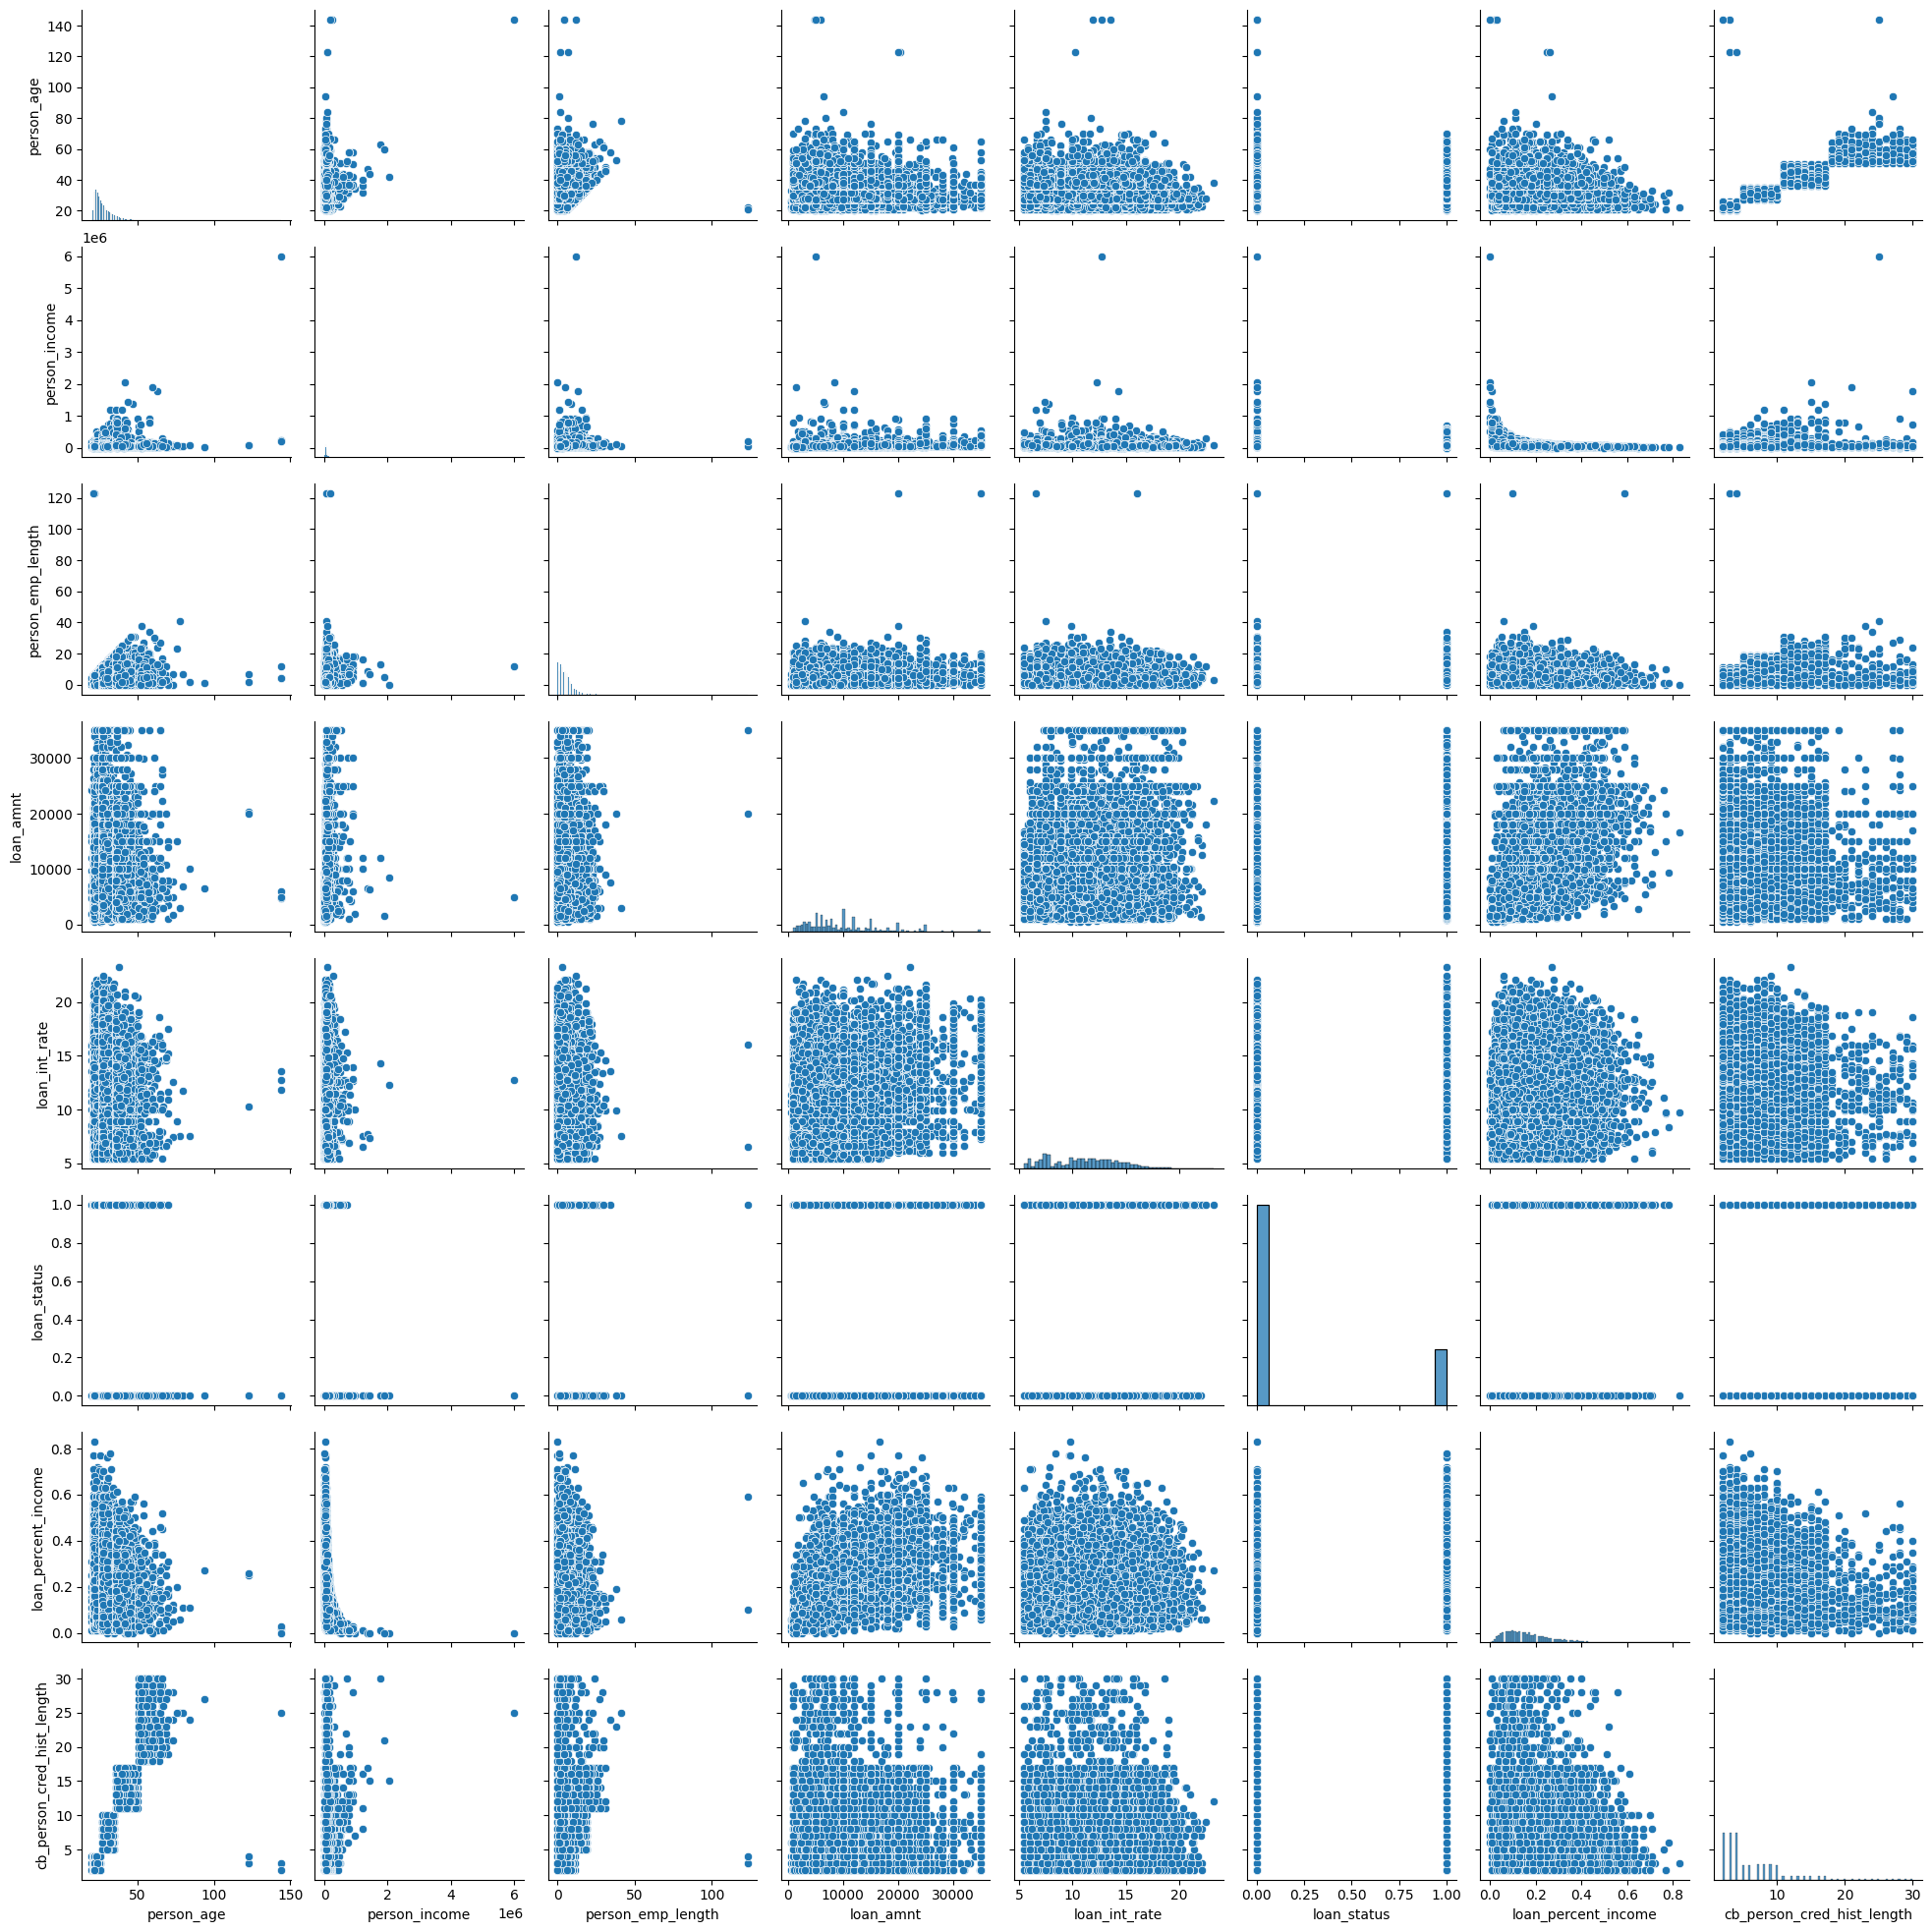

In [ ]:
# Visualiasation des variables par nuages points
sns.pairplot(df)
plt.show()

In [ ]:
#Création de  tableaux croisés dynamiques
pd.crosstab(df['loan_intent'],df['loan_status'],margins=True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [ ]:
#Création d'un tableau croisé de la propriété du logement, du statut du prêt et de la moyenne de loan_percent_income
df.pivot_table(['loan_percent_income'],['loan_status','loan_grade'],aggfunc='mean')

loan_percent_income
loan_status loan_grade                     
0           A                      0.139623
            B                      0.155128
            C                      0.148345
            D                      0.165475
            E                      0.174636
            F                      0.185775
            G                      0.040000
1           A                      0.280839
            B                      0.278995
            C                      0.253189
            D                      0.208748
            E                      0.223317
            F                      0.228118
            G                      0.247143

#### Observation sur le Tableau Croisé Dynamique

Ce tableau croisé dynamique révèle une corrélation significative entre le `loan_percent_income` et le risque de défaillance. Nous observons systématiquement que les prêts en défaut (`loan_status = 1`) présentent un `loan_percent_income` moyen plus élevé que les prêts non défaillants (`loan_status = 0`), et ce, pour toutes les catégories de `loan_grade`. Cela souligne l'importance de ce facteur dans l'évaluation de la solvabilité des emprunteurs. Les grades de prêt 'A', 'B' et 'C' montrent les écarts les plus prononcés, indiquant que pour ces profils, une part élevée du revenu allouée au prêt est un fort indicateur de risque.

In [ ]:
#Création d'un tableau croisé de la propriété du logement, du statut du prêt et de la moyenne de loan_percent_income
df.pivot_table(['loan_percent_income'],['loan_grade','loan_status'],aggfunc='mean')

loan_percent_income
loan_grade loan_status                     
A          0                       0.139623
           1                       0.280839
B          0                       0.155128
           1                       0.278995
C          0                       0.148345
           1                       0.253189
D          0                       0.165475
           1                       0.208748
E          0                       0.174636
           1                       0.223317
F          0                       0.185775
           1                       0.228118
G          0                       0.040000
           1                       0.247143

#### Observation sur le Tableau Croisé Dynamique (Regroupement par Grade)

Ce tableau confirme et affine les observations précédentes. En regroupant les données d'abord par `loan_grade` puis par `loan_status`, il devient encore plus clair que, pour *chaque catégorie de prêt*, un `loan_percent_income` moyen significativement plus élevé est un indicateur fort de défaillance. Les prêts défaillants (`loan_status = 1`) affichent invariablement un pourcentage de revenu alloué au prêt supérieur à celui des prêts non défaillants (`loan_status = 0`). Cette structuration met en lumière les seuils de risque potentiels propres à chaque grade, permettant une analyse plus granulaire et potentiellement l'ajustement de stratégies de prêt basées sur ces catégories.

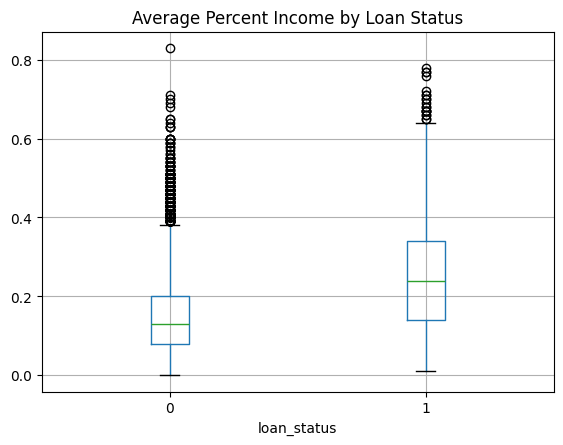

In [ ]:
#Créez un boxplot du pourcentage du prêt par rapport au revenu de la personne, groupé par loan_status
df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

#### Observation sur le Boxplot de `loan_percent_income`

Ce boxplot confirme visuellement que les prêts en défaut (`loan_status = 1`) présentent un `loan_percent_income` médian et interquartile significativement plus élevé que les prêts non défaillants (`loan_status = 0`). Cela renforce l'importance du pourcentage de revenu alloué au prêt comme indicateur clé du risque de défaillance.

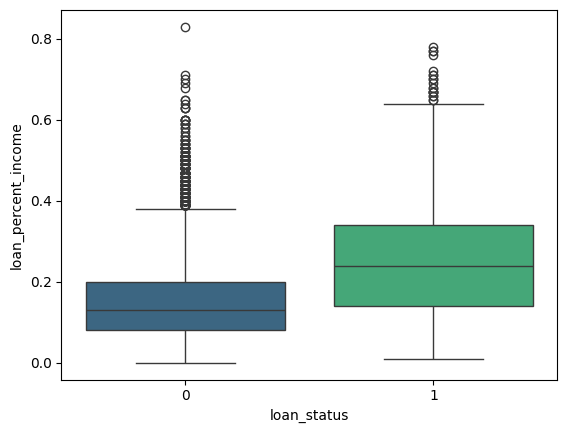

In [ ]:
# Quelle est la relaion entre le pourcentage du revenu et le status du crédit ?
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette='viridis', hue='loan_status', legend=False)
plt.show()

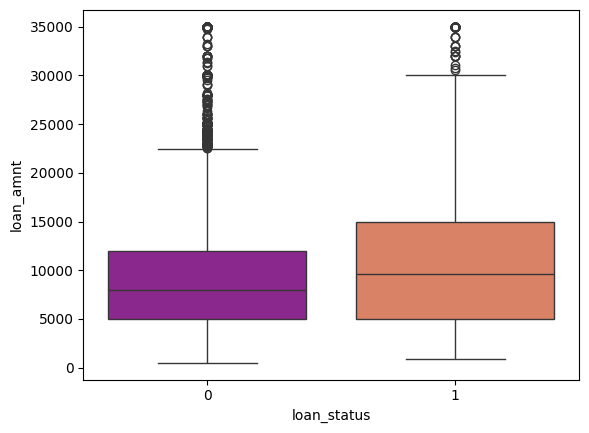

In [ ]:
# Visualisation de loan_amnt vs loan_status
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='plasma', hue='loan_status', legend=False)
plt.show()

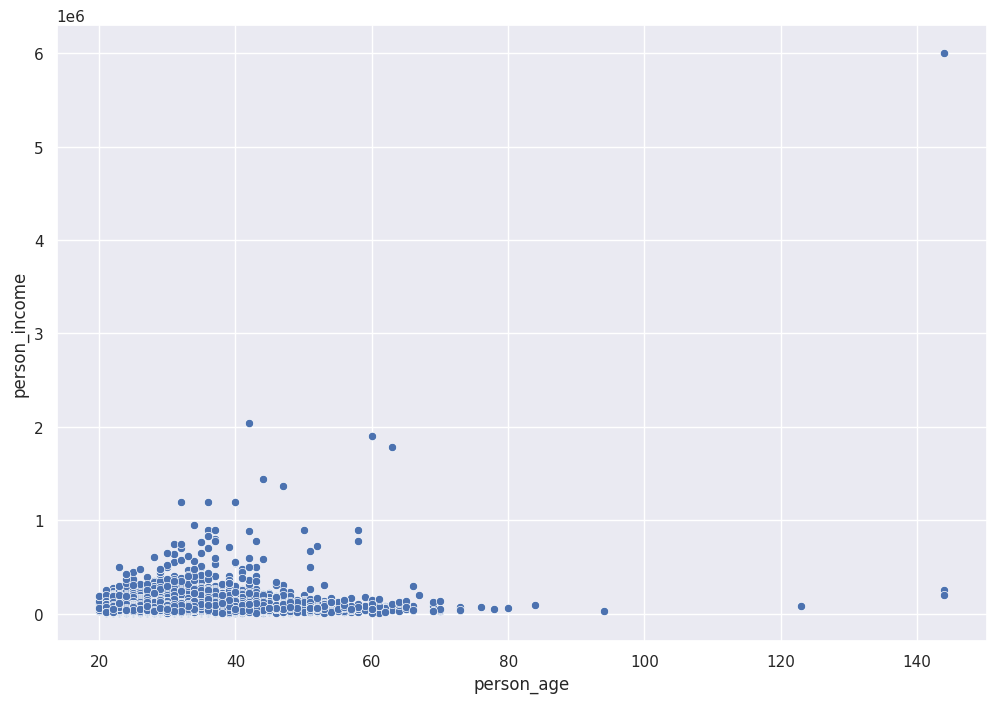

In [ ]:
# Pour tracer le nuage des points de revenu en fonction de l'age
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='person_age', y='person_income', data=df)
plt.show()

**Nettoyage des données**

In [ ]:
#Détection des outliers par les tables croisés
df.pivot_table(index=['person_home_ownership','loan_status'], values=['loan_int_rate'],aggfunc='mean').round(2)


loan_int_rate
person_home_ownership loan_status               
MORTGAGE              0                    10.06
                      1                    13.43
OTHER                 0                    11.41
                      1                    13.56
OWN                   0                    10.75
                      1                    12.24
RENT                  0                    10.75
                      1                    12.97

In [ ]:
def detection_outliers_by_iqr(y):
    Q1, Q3 = np.quantile(y, 0.25), np.quantile(y, 0.75)
    iqr = Q3 - Q1
    borne_inf = Q1 - iqr * 1.5
    borne_sup = Q3 + iqr * 1.5

    outliers_values = y[(y < borne_inf) | (y > borne_sup)]
    num_outliers = len(outliers_values)
    total_elements = len(y)

    if total_elements > 0:
        percentage_outliers = (num_outliers / total_elements) * 100
    else:
        percentage_outliers = 0.0

    return f"{y.name if hasattr(y, 'name') else 'Série'}: {num_outliers} valeurs aberrantes ({percentage_outliers:.1f}%)"


In [ ]:
# identification des outliers par Isolation Forest

# Sélectionner uniquement les colonnes numériques
df_num = df.select_dtypes(include=['number'])

# Appliquer l'Isolation Forest uniquement sur les colonnes numériques
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_num)

# Ajouter les labels d'anomalie au DataFrame original
df['Outlier'] = outlier_labels

# Afficher les outliers
outliers = df[df['Outlier'] == -1]
print("Outliers détectés :")
print(outliers)

Outliers détectés :
       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
6              26          77100                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_

In [ ]:
#Gestion des valeurs aberrantes

<Axes: xlabel='person_age', ylabel='person_income'>

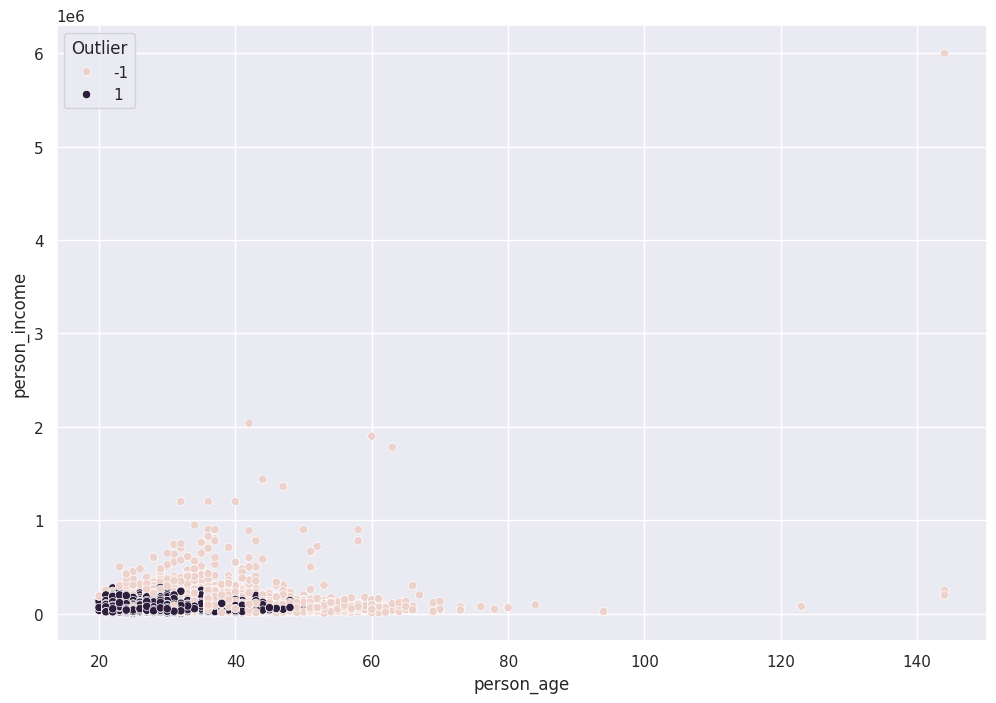

In [ ]:
sns.scatterplot(x='person_age', y='person_income', hue='Outlier', data=df)

In [ ]:
# Nettoyage des valeurs aberrantes

In [ ]:
indices = df [df['person_emp_length'] >= 60].index
df.drop(indices, inplace=True)

<Axes: xlabel='person_emp_length', ylabel='loan_int_rate'>

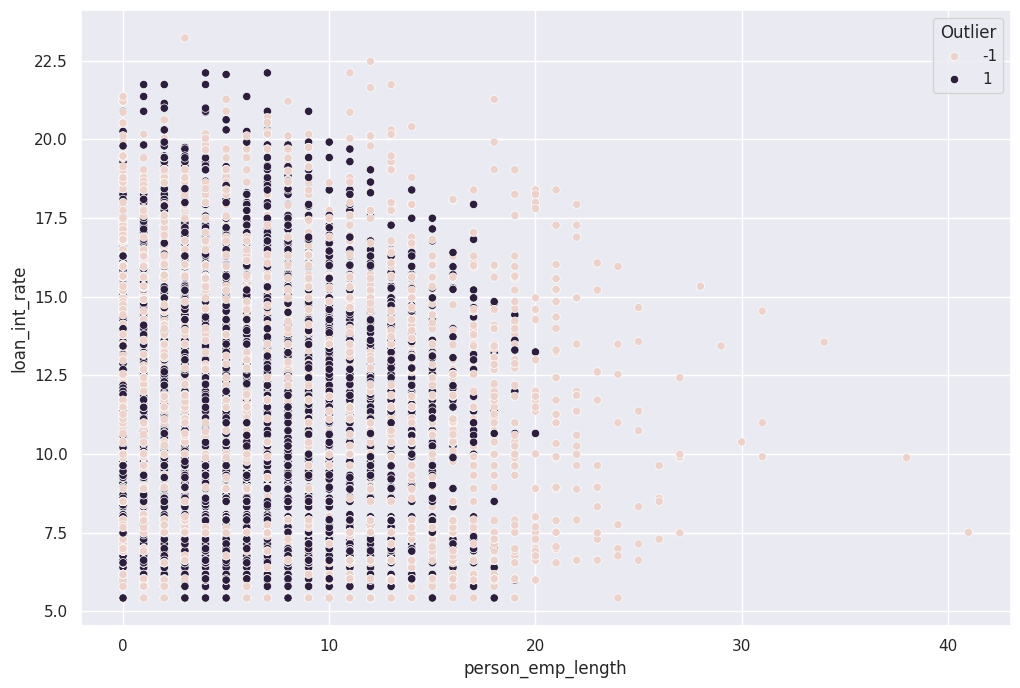

In [ ]:
sns.scatterplot(x='person_emp_length', y='loan_int_rate', hue='Outlier', data=df)

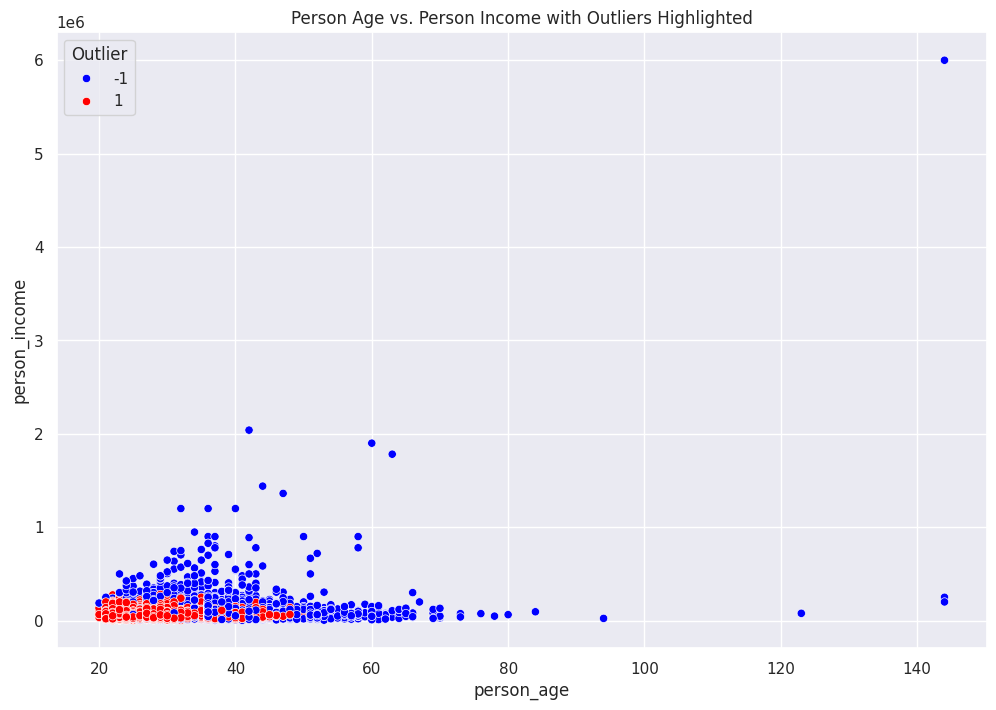

In [ ]:
sns.scatterplot(x='person_age', y='person_income', hue='Outlier', data=df, palette={-1: 'blue', 1: 'red'})
plt.title('Person Age vs. Person Income with Outliers Highlighted')
plt.show()

In [ ]:
indices = df [df['person_emp_length'] >= 60].index
df.drop(indices, inplace=True)

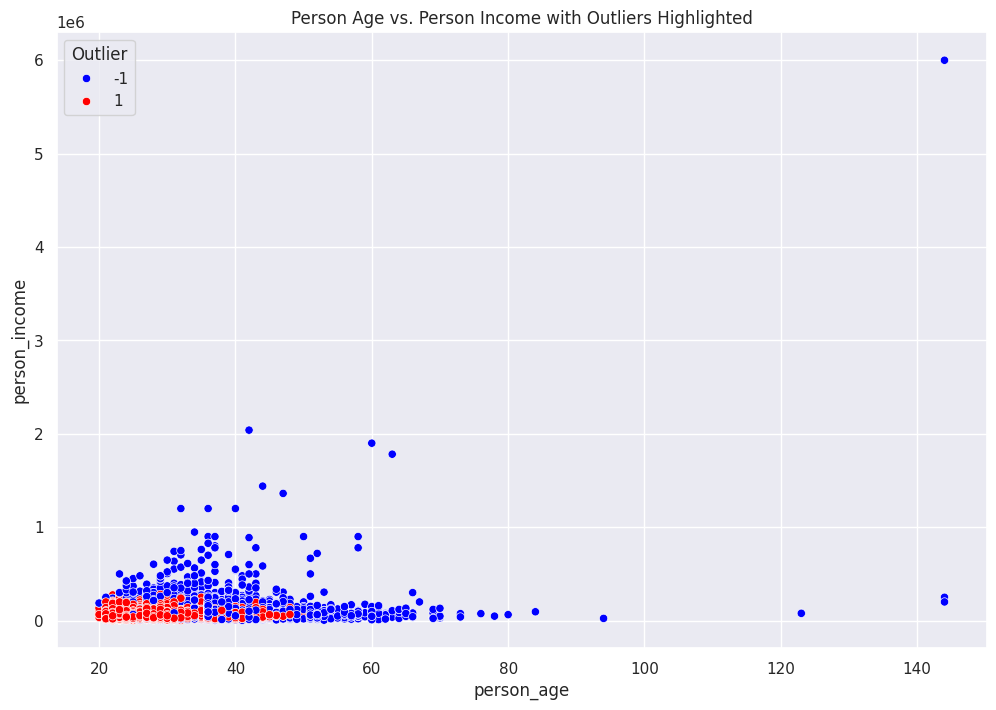

In [ ]:
sns.scatterplot(x='person_age', y='person_income', hue='Outlier', data=df, palette={-1: 'blue', 1: 'red'})
plt.title('Person Age vs. Person Income with Outliers Highlighted')
plt.show()

In [ ]:
# Remplace les valeurs aberrantes de colonnne age par l'age limite à 85 ans
indices = df [df['person_age'] >= 100].index
df.drop(indices, inplace=True)

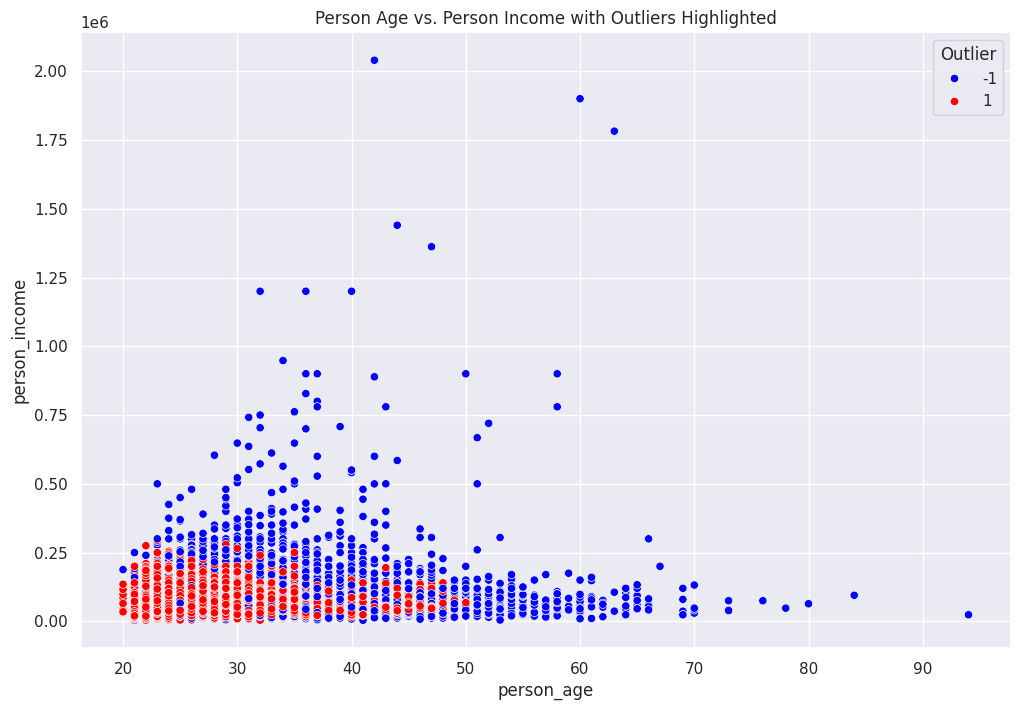

In [ ]:
sns.scatterplot(x='person_age', y='person_income', hue='Outlier', data=df, palette={-1: 'blue', 1: 'red'})
plt.title('Person Age vs. Person Income with Outliers Highlighted')
plt.show()

In [ ]:
#Détection des valeurs manquantes
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3115
loan_status,0
loan_percent_income,0


In [ ]:
# Somme des valeurs manquantes par colonnes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

,0
person_emp_length,895
loan_int_rate,3115


In [ ]:
# Imputation des valeurs manquantes de colonne loan_intest_rate par la moyenne
df.fillna({'loan_int_rate': df['loan_int_rate'].mean()}, inplace=True)

In [ ]:
# Imputation des valeurs manquantes de colonne person_emp_length par la mediane
df.fillna({'person_emp_length': df['person_emp_length'].median()}, inplace=True)

In [ ]:
# Vérification après imputation
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

,0


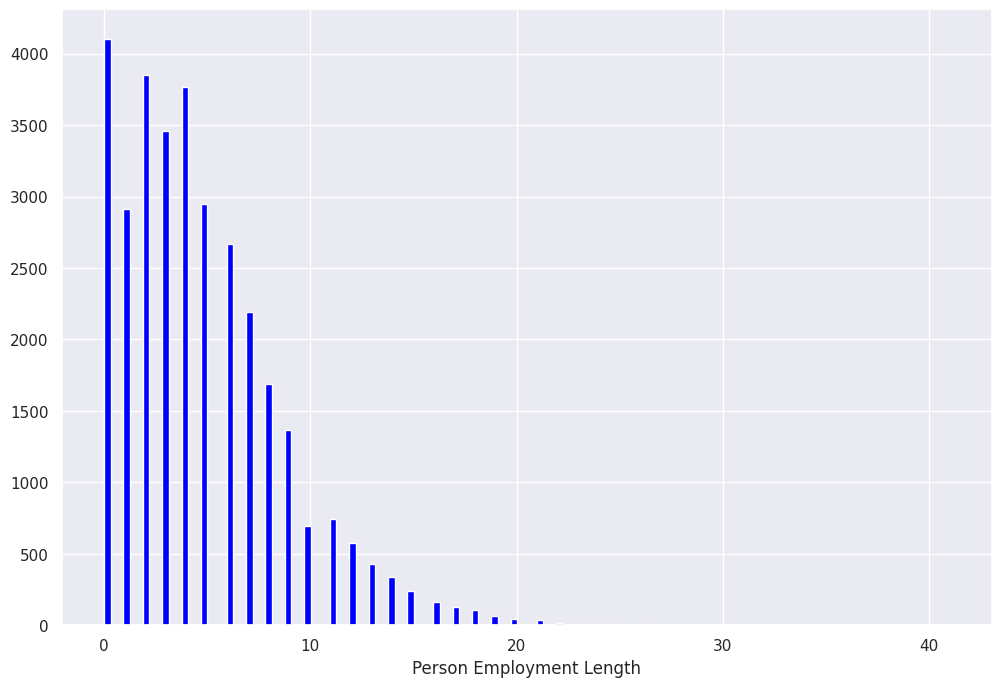

In [ ]:
# Création d'un histogramme de employment length
n, bins, patches = plt.hist(df['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

Transformation des variables catégorielles en variables numériques

In [ ]:
# Dataframe des variables numériques
df_num = df.select_dtypes(exclude=['object'])

In [ ]:
# Dataframe des variables non numériques
df_cat = df.select_dtypes(include=['object'])

In [ ]:
# Transformation des variables non-numériques
df_cat_dummies = pd.get_dummies(df_cat)

In [ ]:
# Nouvelle Dataframe
df_new = pd.concat([df_num, df_cat_dummies], axis=1)

In [ ]:
print (df_new.shape)

(32574, 28)


**Partie de ML de modélisation des données**

In [ ]:
# Modèle de régression logistique

Séparation des données DataFrame en donnée d'entrainement (Train data) et en données d'évaluation (test data) du  modèle

In [ ]:
# Train/test data

X = df_new.drop('loan_status', axis = 1) # X est une dataframe constituée uniquement des variables indépendantes de df

y = df_new['loan_status'] # y est la variable dépendante (variable d'intérêt)

seed = 123

X_train, X_test, y_train, y_test = train_test_split (X, y, stratify = y, test_size = 0.3, random_state = seed)

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(22801, 27)
(9773, 27)
(22801,)
(9773,)


Dans la fonction train_test_split() :
• L'argument **stratify = y **est très important surtout quand on a un déséquilibre de classe
dans les données. Il permet de créer des données d'entraînement et des données de test
ayant les mêmes proportions d'étiquettes de classe que l'ensemble de données originel ;
•** test_size = 0.3** veut dire que 30% des données serviront à évaluer le modèle et donc que
70% des données serviront à entraîner l'algorithme ;
•** random_state** est défini afin de s'assurer de la reproductibilité de l'opération. En effet,
en définissant l'argument random_state, on est assuré qu'à chaque fois que le code sera
exécuté, ce seront les mêmes données d'entraînement et de test qui seront générées.

In [ ]:
# Etape de normalisation des données
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Normalisez les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle avec données normalisées
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [ ]:
#Print the number of nulls
print(df['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = df[df['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = df.drop(indices)

0


In [ ]:
# Create the X and y data sets
X = cr_loan_clean[["loan_int_rate"]]
y = cr_loan_clean[["loan_status"]]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(random_state=42)
clf_logistic_single.fit(X, np.ravel(y))
# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4226231]


In [ ]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate', 'person_emp_length', 'loan_amnt']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.3504454]


In [ ]:
# créer les ensembles de données X et y
X = cr_loan_clean[['loan_int_rate', 'person_emp_length', 'person_income', 'loan_amnt']]
y = cr_loan_clean[['loan_status']]

#Utiliser test_train_split pour créer les ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Créer et ajuster (entraîner) le modèle de régression logistique
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Afficher les coefficients du modèle
print(clf_logistic.coef_)

[[ 2.70056742e-01 -3.24693398e-02 -3.13278393e-05  9.90277849e-05]]


**Entrainement de modèle**

In [ ]:
#  Prédire l'avenir, probablement avec la fonction .predict_proba()
# Entrainer le model
clf_logistic.fit(X_train, np.ravel(y_train))
# Prédire en utilisant le modèle
clf_logistic.predict_proba(X_test)


array([[0.77402038, 0.22597962],
       [0.78454477, 0.21545523],
       [0.45073069, 0.54926931],
       ...,
       [0.59395092, 0.40604908],
       [0.54962125, 0.45037875],
       [0.7646842 , 0.2353158 ]])

In [ ]:
# 1. Store the probabilities in a variable
preds_proba = clf_logistic.predict_proba(X_test)

# 2. Create a DataFrame with clear column names
preds_df = pd.DataFrame(preds_proba, columns=['prob_non_default', 'prob_default'])

# 3. View the first 5 rows
print(preds_df.head())

   prob_non_default  prob_default
0          0.774020      0.225980
1          0.784545      0.215455
2          0.450731      0.549269
3          0.741209      0.258791
4          0.996949      0.003051


In [ ]:
# Prédire en utilisant le modèle
X1_train = X_train[['loan_int_rate', 'person_emp_length']]
X2_train = X_train.copy()

# Afficher les cinq premières lignes de chaque ensemble d'entraînement
print(X1_train.head())
print(X2_train.head())

# Créer et entraîner un modèle sur les premières données d'entraînement
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

#Créer et entraîner un modèle sur les secondes données d'entraînement
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Afficher les coefficients de chaque modèle
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       loan_int_rate  person_emp_length
24241           5.79                5.0
32190          13.92                2.0
19167          13.80                3.0
19691          10.36                0.0
12359          12.21                7.0
       loan_int_rate  person_emp_length  person_income  loan_amnt
24241           5.79                5.0          30000       4200
32190          13.92                2.0          60000       8000
19167          13.80                3.0          42000       2400
19691          10.36                0.0          12240       3250
12359          12.21                7.0          80000      17000
[[ 0.26717509 -0.05549465]]
[[ 2.70056742e-01 -3.24693398e-02 -3.13278393e-05  9.90277849e-05]]


In [ ]:
# Create two data sets for numeric and non-numeric data
cred_num = df.select_dtypes(exclude=['object'])
cred_str = df.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'Outlier',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'],
      dtype='object')


In [ ]:
#  Entraîner le modèle de régression logistique sur les données d'entraînement
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Créer des prédictions de probabilité pour le statut de prêt en utilisant les données de test
preds = clf_logistic.predict_proba(X_test)

#Créer des dataframes des cinq premières prédictions, et des cinq premières étiquettes (labels) réelles
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concaténer et afficher les deux dataframes pour comparaison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.225980
1            1      0.215455
2            1      0.549269
3            1      0.258791
4            0      0.003051


In [ ]:
#Vérification de précision globale sur test data (accuracy)
clf_logistic.score(X_test, y_test)

0.8234075211051419

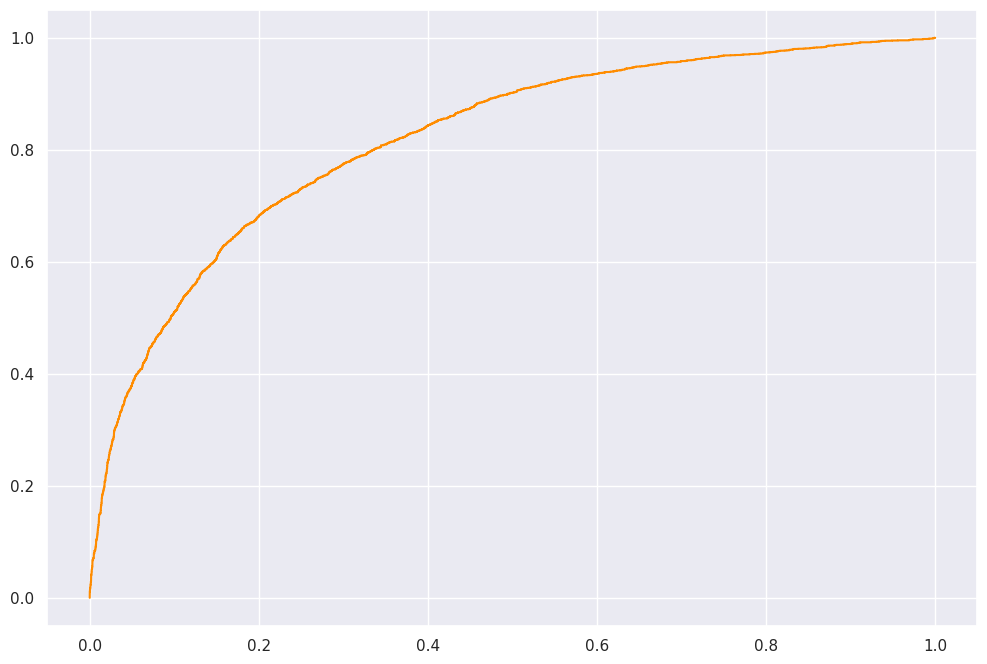

In [ ]:
# Trouvons la probabilité pour la classe positive (loan_status = 1)
proba_default = preds_proba[:, 1]

# ROC curve charts, cette courbe permet de visualiser la performance du modèle pour tous les seuils possibles
#Fallout (Taux de Faux Positifs) : Axe X. C'est la probabilité de rejeter un bon client par erreur.
# Sensitivity (Rappel / Taux de Vrais Positifs) : Axe Y. C'est la capacité à détecter les mauvais payeurs.

fallout, sensitivity, thresholds = roc_curve(y_test, proba_default)
plt.plot(fallout, sensitivity, color='darkorange' )

**EVALUATION DES PERFORMANCES DU MODELE**

In [ ]:
# Précision globale du modèle
print("Le score sur les données d'entraînement est :", clf_logistic.score(X_train, y_train))
print("Le score sur les données d'évaluation est :", clf_logistic.score(X_test, y_test))

Le score sur les données d'entraînement est : 0.8214285714285714
Le score sur les données d'évaluation est : 0.8234075211051419


In [ ]:
# Prédictions sur le test data
y_pred = clf_logistic.predict(X_test)
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90     10165
           1       0.73      0.31      0.44      2865

    accuracy                           0.82     13030
   macro avg       0.78      0.64      0.67     13030
weighted avg       0.81      0.82      0.79     13030



In [ ]:
# Définition des seuils
# Réasigner la valeur de seuil de statut de crédit à 0.5
preds= clf_logistic.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
preds_df['loan_status'] = preds_df['prob_default']. apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
preds_df.head()

,prob_default,loan_status
0,0.225980,0
1,0.215455,0
2,0.549269,1
3,0.258791,0
4,0.003051,0


**Rapport de classification de crédit**

In [ ]:
# Prédictions sur le test data
y_pred = clf_logistic.predict(X_test)
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90     10165
           1       0.73      0.31      0.44      2865

    accuracy                           0.82     13030
   macro avg       0.78      0.64      0.67     13030
weighted avg       0.81      0.82      0.79     13030



0.8234075211051419


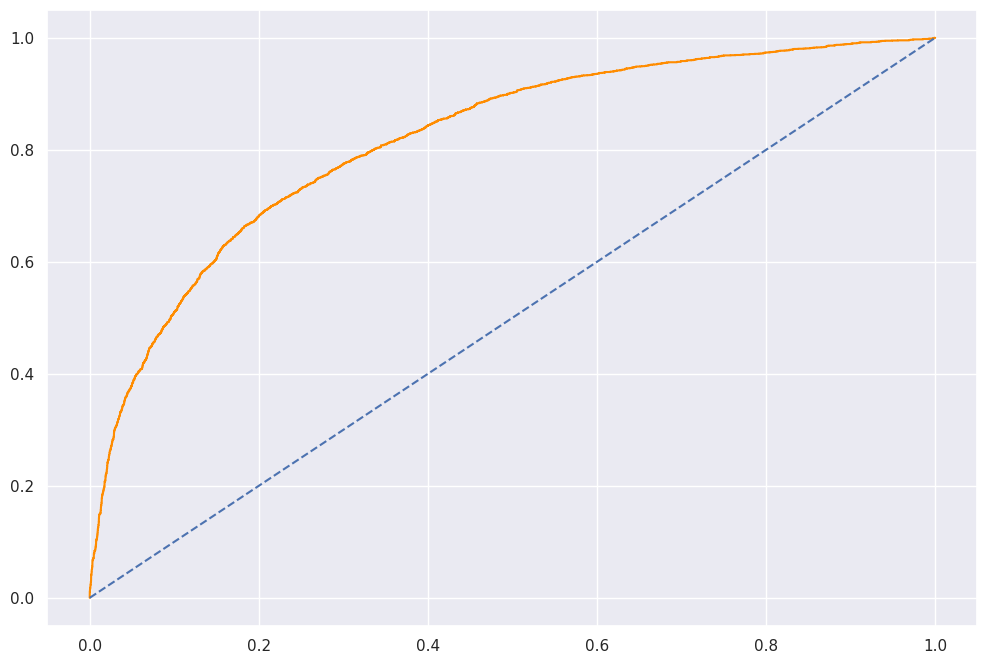

In [ ]:
# Créer les prédictions de probabilité et les stocker dans preds(prédiction)
preds = clf_logistic.predict_proba(X_test)

# Afficher le score d'exactitude (accuracy) du modèle
print(clf_logistic.score(X_test, y_test))

# Tracer la courbe ROC des probabilités de défaut
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Calculer l'AUC et le stocker dans une variable
auc = roc_auc_score(y_test, prob_default)


La Courbe ROC (Receiver Operating Characteristic) :
Elle permet de visualiser la performance du modèle pour tous les seuils possibles (pas seulement 0.5).
Fallout (Taux de Faux Positifs) : Axe X. C'est la probabilité de rejeter un bon client par erreur.
Sensitivity (Rappel / Taux de Vrais Positifs) : Axe Y. C'est la capacité à détecter les mauvais payeurs.
La ligne pointillée représente un modèle aléatoire. Plus la courbe orange s'éloigne de cette ligne vers le coin supérieur gauche, meilleur est le modèle.
L'AUC (Area Under the Curve) :
L'AUC résume la courbe ROC en un seul chiffre entre 0 et 1. L'AUC de notre modèle est de 0,8 justifiant un très bon modèle.

In [ ]:
# Autres métriques d'évaluation du modèle
# La matrice de confusion
# Définir le seuil pour les défauts de paiement à 0,5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test, preds_df['loan_status']))

[[9831  334]
 [1967  898]]


Ici les valeurs de loan_status en utilisant un seuil de 0.5 pour la probabilité de défaut dans preds_df. Pour afficher la matrice de confusion des données y_test et des nouvelles valeurs de statut de prêt.



In [ ]:
# Définir le seuil pour les défauts de paiement à 0,4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test, preds_df['loan_status']))


[[9347  818]
 [1526 1339]]


In [ ]:
# Réassigner les valeurs de statut de prêt en utilisant le nouveau seuil
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Stocker le nombre de défauts de prêt à partir des données de prédiction
# Note: value_counts() retourne une série pandas, il faut sélectionner l'index 1 qui correspond aux défauts (classe 1)
num_defaults = preds_df['loan_status'].value_counts()[1]

# Récupérer le taux de rappel des défauts à partir du rapport de classification
# Note: precision_recall_fscore_support retourne un tuple de 4 arrays. [1] sélectionne le recall array, et [1] la valeur pour la classe 1 (défaut).
precision_recall_fscore_support_results = precision_recall_fscore_support(y_test, preds_df['loan_status'])
default_recall = precision_recall_fscore_support_results[1][1]

# Calculer l'impact estimé du nouveau taux de rappel de défaut
# Nous supposons que 'cr_loan' et 'avg_loan_amnt' sont définis dans votre environnement précédent.
avg_loan_amnt = df['loan_amnt'].mean()
estimated_loss = num_defaults * avg_loan_amnt * (1 - default_recall)
print('estimated_loss', estimated_loss)


estimated_loss 11015618.720079001


In [ ]:
#Arrondir la perte estmée à 2 décimales
rounded_number = round(11556947.305963827, 2)
print(rounded_number)

11556947.31


Le recall des prêts en défaut de paiement est égal à 0,24 ce qui signifie que 24% des véritables
prêts en défaut de paiement ont été correctement prédits donc 76% des véritables prêts en défaut
de paiement ont été mal prédits par le modèle comme étant des prêts qui ne sont pas en défaut
de paiement. Ceci constitue un grand risque de perte d'argent pour la banque.

L'impact financier estimé de ce modèle
si la banque implementait ce modèle dans son sytème de crédit avec un seuil de probabilité de défaut de 0,4, la perte inattendue serait estimé de 11 556 947,31. Le second scénario avec un seuil de 0,5, la banque perdrait énormément d'argent la perte serait de 7 420 023,66.

Visualisation graphique de l'impact de changement des seuils de probabilité sur les différents métriques

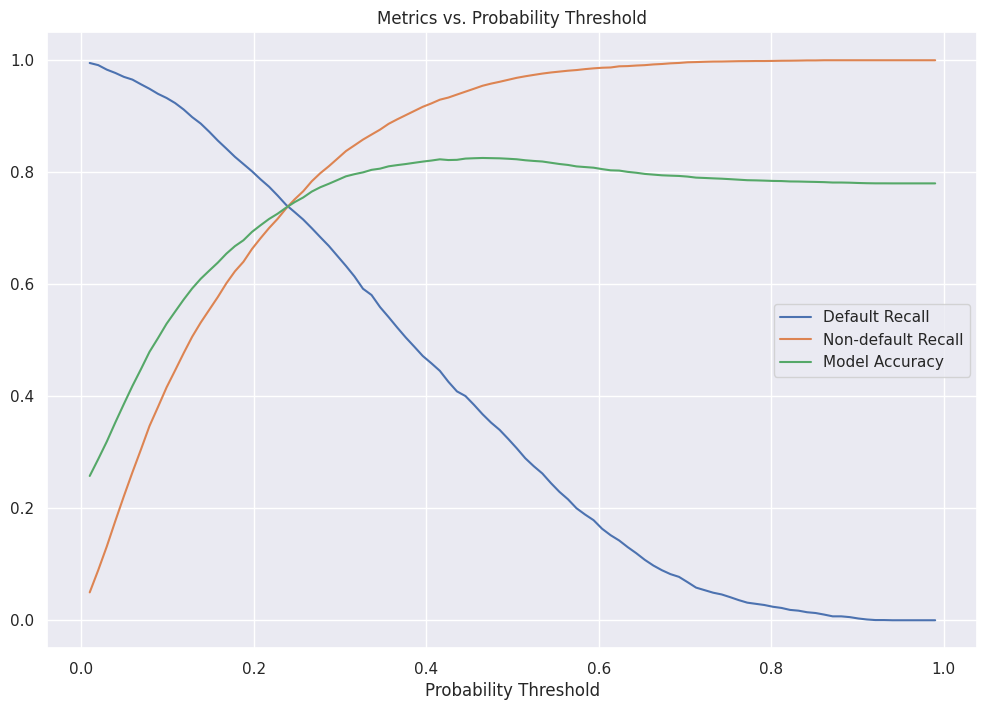

In [ ]:
import warnings
from sklearn.metrics import precision_recall_fscore_support

# Calculate metrics for different thresholds
thresh = np.linspace(0.01, 0.99, 100) # Create 100 thresholds between 0.01 and 0.99
def_recalls = []
nondef_recalls = []
accs = []

# Re-initialize preds_df with the full logistic regression probabilities
# preds_proba was generated in cell mCQzVShUSevF from clf_logistic.predict_proba(X_test)
preds_df = pd.DataFrame(preds_proba[:, 1], columns=['prob_default'])

#Ignorer les warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
    for t in thresh:
        # Relabel predictions based on the current threshold
        y_pred_thresh = (preds_df['prob_default'] > t).astype(int)

        # Calculate metrics for the current threshold
        # Using average=None to get metrics for each class (0 and 1)
        precision, recall, fscore, support = precision_recall_fscore_support(
            y_test['loan_status'].values, y_pred_thresh.values, average=None, labels=[0, 1]
        )

        # Recall for class 1 (Default)
        def_recalls.append(recall[1])
        # Recall for class 0 (Non-default)
        nondef_recalls.append(recall[0])

        # Calculate accuracy
        accuracy = (y_test['loan_status'].values == y_pred_thresh.values).mean()
        accs.append(accuracy)

# Tracer le graphique avec thresh en abscisse et les métriques en ordonnée
plt.plot(thresh, def_recalls)
plt.plot(thresh, nondef_recalls)
plt.plot(thresh, accs)

# Ajouter les labels et la légende
plt.xlabel("Probability Threshold")
# Removed plt.xticks(ticks) as 'ticks' is not defined
plt.legend(["Default Recall", "Non-default Recall", "Model Accuracy"])
plt.title("Metrics vs. Probability Threshold")

# Afficher le graphique
plt.show()

C'est le schéma le plus facile à voir sur ce graphique, car c'est le point où les trois lignes convergent. Ce seuil constituerait un excellent point de départ, mais déclarer que tous les prêts au-dessus de 0.275 sont un défaut n'est probablement pas pratique.



**Modélisation avec l'arbre des décisions de XGBoost**

In [ ]:
# Create a gradient boosted tree model
clf_xgb = xgb.XGBClassifier()
# Train the gradient boosted tree
clf_xgb.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Prédiction de risque de crédit avec XGBoost

In [ ]:
# Créer et entraîner un modèle XGBClassifier (Arbre à Gradient Boosting)
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Prédire les probabilités de défaut sur les données de test
gbt_preds = clf_gbt.predict_proba(X_test)

# Créer les DataFrames pour les 5 premières prédictions et les vraies valeurs
preds_df = pd.DataFrame(gbt_preds[:, 1][0:5], columns=['prob_default'])
true_df = y_test.head()

# Concaténer et afficher les deux DataFrames pour comparaison
print(pd.concat([true_df.reset_index(drop=True), preds_df], axis=1))

   loan_status  prob_default
0            0      0.234627
1            1      0.386899
2            1      0.551715
3            1      0.846779
4            0      0.051390


In [ ]:
# 1. Calcul des probabilités de défaut (colonne 1 du résultat de predict_proba)
# On utilise les modèles déjà entraînés précédemment
lr_probs = clf_logistic.predict_proba(X_test)[:, 1]
gbt_probs = clf_gbt.predict_proba(X_test)[:, 1]

# 2. Création du data frame "portfolio"
# Note : loan_amnt provient de X_test pour correspondre aux prédictions
portfolio = pd.DataFrame({
    'lr_probs': lr_probs,
    'gbt_probs': gbt_probs,
    'lgd': 0.20,
    'loan_amnt': X_test['loan_amnt'].values})

# 3. Réinitialisation de l'index pour un alignement propre
portfolio.reset_index(drop=True, inplace=True)


In [ ]:
# Afficher les cinq premières lignes du data frame portfolio
print(portfolio.head())

# Créer les colonnes de perte attendue pour chaque modèle selon la formule :
# Perte Attendue = Probabilité de Défaut * Exposition (Montant) * Perte en cas de défaut (LGD)
portfolio['lr_expected_loss'] = portfolio['lr_probs'] * portfolio['loan_amnt'] * portfolio['lgd']
portfolio['gbt_expected_loss'] = portfolio['gbt_probs'] * portfolio['loan_amnt'] * portfolio['lgd']

# Afficher la somme de la perte attendue pour le modèle de Régression Logistique (lr)
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Afficher la somme de la perte attendue pour le modèle de Gradient Boosting (gbt)
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))


   lr_probs  gbt_probs  lgd  loan_amnt
0  0.225980   0.234627  0.2       3000
1  0.215455   0.386899  0.2      11200
2  0.549269   0.551715  0.2      12000
3  0.258791   0.846779  0.2      11500
4  0.003051   0.051390  0.2       6000
LR expected loss:  6102754.665288987
GBT expected loss:  6069005.973844728


In [ ]:
# Prédire les étiquettes pour le statut de prêt
gbt_preds = clf_gbt.predict(X_test)

# Vérifier les valeurs créées par la méthode predict (doit être 0 ou 1)
print(gbt_preds)

# Afficher le rapport de classification du modèle
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))


[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.89      0.95      0.92     10165
     Default       0.76      0.59      0.66      2865

    accuracy                           0.87     13030
   macro avg       0.82      0.77      0.79     13030
weighted avg       0.86      0.87      0.86     13030



📊 **Analyse de Performance du Modèle (XGBoost)**

🔍 Points Clés de l'Évaluation :
Excellente détection des bons clients (Recall Non-Default : 95%) : Le
modèle est extrêmement performant pour identifier les emprunteurs fiables. Cela minimise le risque de "manque à gagner" pour la banque en évitant de
rejeter des dossiers sains.
Alerte sur le risque de crédit (Recall Default : 58%) : C'est le point de vigilance majeur. Le modèle ne détecte que 58 % des défauts de paiement réels. Cela signifie que 42 % des clients risqués sont classés comme sains par le modèle (Faux Négatifs).
Fiabilité des alertes (Precision Default : 76%) : Lorsqu'un défaut est prédit, l'information est fiable dans 3 cas sur 4.

💡 Conclusion & Stratégie :
Le modèle actuel favorise la croissance commerciale (acceptation massive de prêts) au détriment de la sécurité du capital.

**Recommandation métier** : Afin de réduire la perte attendue de 5,9 M€, nous préconisons d'abaisser le seuil de décision (actuellement à 0.5) vers 0.35 ou 0.40. Cette action augmentera le rappel des défauts (détection des risques) et renforcera la résilience financière du portefeuille, quitte à rejeter quelques profils marginaux.





**Selection des colonnes pour le risque de crédit**

In [ ]:
# Select a few specific columns
X_multi = cr_loan_prep[['loan_int_rate', 'person_emp_length']]

In [ ]:
# Select all data except loan_status
X = cr_loan_prep.drop ('loan_status', axis = 1)

In [ ]:
# Train the model
clf_gbt.fit(X_train, np.ravel(y_train))
# Print the feature importances
clf_gbt.get_booster().get_score(importance_type='weight')

{'loan_int_rate': 1130.0,
 'person_emp_length': 632.0,
 'person_income': 1236.0,
 'loan_amnt': 1006.0}

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

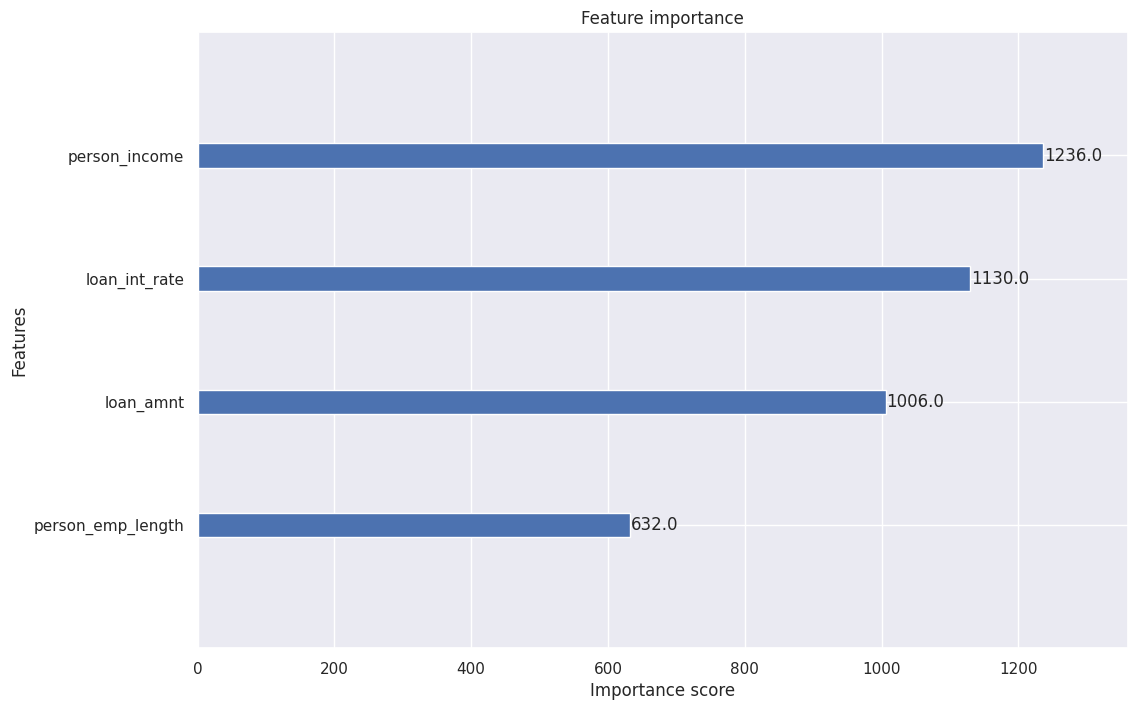

In [ ]:
# visualiasation de l'importance des colonnes features avec la fonction .plot_importance() de XGBoost
xgb.plot_importance(clf_gbt, importance_type= 'weight')

In [ ]:
# Cross validation ou validation croisée des modèles de crédit

# Définir le nombre de folds et les itérations d'arrêt anticipé
n_folds = 5
early_stopping = 10

# Définir les paramètres pour XGBoost
params = {
    'objective': 'binary:logistic',  # Pour la classification binaire
    'eval_metric': 'logloss',        # Métrique d'évaluation
    'eta': 0.1,                      # Taux d'apprentissage
    'max_depth': 3,                  # Profondeur maximale de l'arbre
    'subsample': 0.8,                # Ratio de sous-échantillonnage des données d'entraînement
    'colsample_bytree': 0.8          # Ratio de sous-échantillonnage des colonnes lors de la construction de l'arbre
}

# Créer la matrice DMatrix pour XGBoost à partir des données d'entraînement
# La DMatrix est une structure de données interne optimisée pour XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Créer le DataFrame des validations croisées
# On utilise les paramètres (params), la matrice, le nombre de rounds et le pliage (folds)
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Afficher le contenu du DataFrame de validation croisée
print(cv_df)

   train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0            0.502207           0.002978           0.502609          0.011436
1            0.491422           0.002803           0.492117          0.011254
2            0.483002           0.002853           0.483844          0.011057
3            0.476429           0.002835           0.477487          0.010945
4            0.460815           0.003224           0.462140          0.010651


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()} # Corrected: added xgb. prefix

# Effectuer la CV pour chaque modèle
for name, model in models.items():
    scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring="roc_auc") # Corrected: X_scaled to X and y to y.values.ravel()
    print(f"{name}: AUC = {scores.mean():.3f} (+/- {scores.std():.3f})")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: AUC = 0.813 (+/- 0.013)
XGBoost: AUC = 0.932 (+/- 0.024)


In [ ]:
y_train['loan_status'].value_counts()

,count
loan_status,
0,15302
1,4242


**Sous-échantillonnage des données d’entraînement**

In [ ]:
# Créez des jeux de données équilibré pour les non-défauts et les défauts
nondefaults = cr_loan_prep[cr_loan_prep['loan_status'] == 0]
defaults = cr_loan_prep[cr_loan_prep['loan_status'] == 1]

# Récupérer le nombre de défauts pour équilibrage
count_default = len(defaults)

# Sous-échantillonnez les non-défauts au même effectif que les défauts
nondefaults_under = nondefaults.sample(count_default)

# Concaténez les non-défauts sous-échantillonnés avec les défauts
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Afficher le décompte des valeurs pour l'état du prêt
print(X_y_train_under['loan_status'].value_counts())


loan_status
0    7107
1    7107
Name: count, dtype: int64


In [ ]:
# 1. Séparer X et y à partir du jeu de données sous-échantillonné
X_train_under = X_y_train_under.drop('loan_status', axis=1)
y_train_under = X_y_train_under['loan_status']

# 2. Créer et entraîner le nouveau modèle (gbt2)
clf_gbt2 = xgb.XGBClassifier().fit(X_train_under, np.ravel(y_train_under))

# Nous devons redéfinir X_test et y_test basés sur l'ensemble complet des données (cr_loan_prep)
# pour qu'ils soient compatibles avec la structure d'entraînement.
X_full = cr_loan_prep.drop('loan_status', axis=1)
y_full = cr_loan_prep['loan_status']

# Effectuer le train_test_split sur l'ensemble complet (en utilisant le même random_state que précédemment)
_, X_test_full, _, y_test_full = train_test_split(X_full, y_full, test_size=0.4, random_state=123)
# X_full et y_full : Ces variables contiennent l'intégralité de jeu de données cr_loan_prep avant tout échantillonnage.
#X_test_full : C'est un échantillon de 40 % des données réelles

# 3. Prédire les étiquettes sur le jeu de test original (avec toutes les caractéristiques)
gbt2_preds = clf_gbt2.predict(X_test_full)

# 4. Afficher le rapport de classification (classification_report)
print(classification_report(y_test_full, gbt2_preds))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10165
           1       0.83      0.93      0.87      2865

    accuracy                           0.94     13030
   macro avg       0.90      0.94      0.92     13030
weighted avg       0.95      0.94      0.94     13030



**Performances de l’arbre sous-échantillonné**

Nous avons sous‑échantillonné l’ensemble d’entraînement et entraîné un modèle sur cet échantillon.

In [ ]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds))
print(confusion_matrix(y_test,gbt2_preds))

[[9623  542]
 [1171 1694]]
[[9603  562]
 [ 203 2662]]


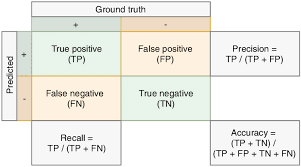

In [ ]:
# Afficher le rapport de classification (classification_report) de l'ancien et du nouveau modèle
print(classification_report(y_test,gbt_preds))
print(classification_report(y_test_full, gbt2_preds))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10165
           1       0.76      0.59      0.66      2865

    accuracy                           0.87     13030
   macro avg       0.82      0.77      0.79     13030
weighted avg       0.86      0.87      0.86     13030

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10165
           1       0.83      0.93      0.87      2865

    accuracy                           0.94     13030
   macro avg       0.90      0.94      0.92     13030
weighted avg       0.95      0.94      0.94     13030



In [ ]:
# Afficher et comparer le score de précision gloable ( AUC score) des deux modèles
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test, gbt2_preds))

0.7689768900403379
0.9369285497837171


📈 Analyse comparative : Impact du rééquilibrage des classes

L'implémentation du sous-échantillonnage (Undersampling) sur l'ensemble d'entraînement a radicalement transformé la performance du modèle. En passant d'une précision globale de **76,9 %** à **93,7 %** sur le jeu de test réel, le modèle XGBoost démontre une capacité nettement supérieure à isoler les signaux de risque, auparavant masqués par la prédominance des dossiers sains.
Cette progression confirme que le déséquilibre initial des classes constituait le principal frein à l'apprentissage. Nous disposons désormais d'un classifieur robuste, capable de généraliser avec une grande fiabilité sur la population réelle tout en optimisant la détection des défauts de paiement.

In [ ]:
#Afficher le rapport de classification de logistic regression
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, y_pred, target_names=target_names))

# Afficher le rapport de classification de gradient boosted tree
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Afficher le score F1 (moyenne macro) pour la régression logistique
# L'index [2] correspond au F1-score dans le tuple retourné par la fonction
print("Score F1 (Macro) - Régression Logistique :")
print(precision_recall_fscore_support(y_test, y_pred, average = 'macro')[2])

# Afficher le score F1 (moyenne macro) pour l'arbre à gradient boosting (XGBoost)
print("Score F1 (Macro) - Gradient Boosting :")
print(precision_recall_fscore_support(y_test, gbt_preds, average = 'macro')[2])


              precision    recall  f1-score   support

 Non-Default       0.83      0.97      0.90     10165
     Default       0.73      0.31      0.44      2865

    accuracy                           0.82     13030
   macro avg       0.78      0.64      0.67     13030
weighted avg       0.81      0.82      0.79     13030

              precision    recall  f1-score   support

 Non-Default       0.89      0.95      0.92     10165
     Default       0.76      0.59      0.66      2865

    accuracy                           0.87     13030
   macro avg       0.82      0.77      0.79     13030
weighted avg       0.86      0.87      0.86     13030

Score F1 (Macro) - Régression Logistique :
0.6668012151841541
Score F1 (Macro) - Gradient Boosting :
0.7912262474081571


Comparer avec des courbes ROC

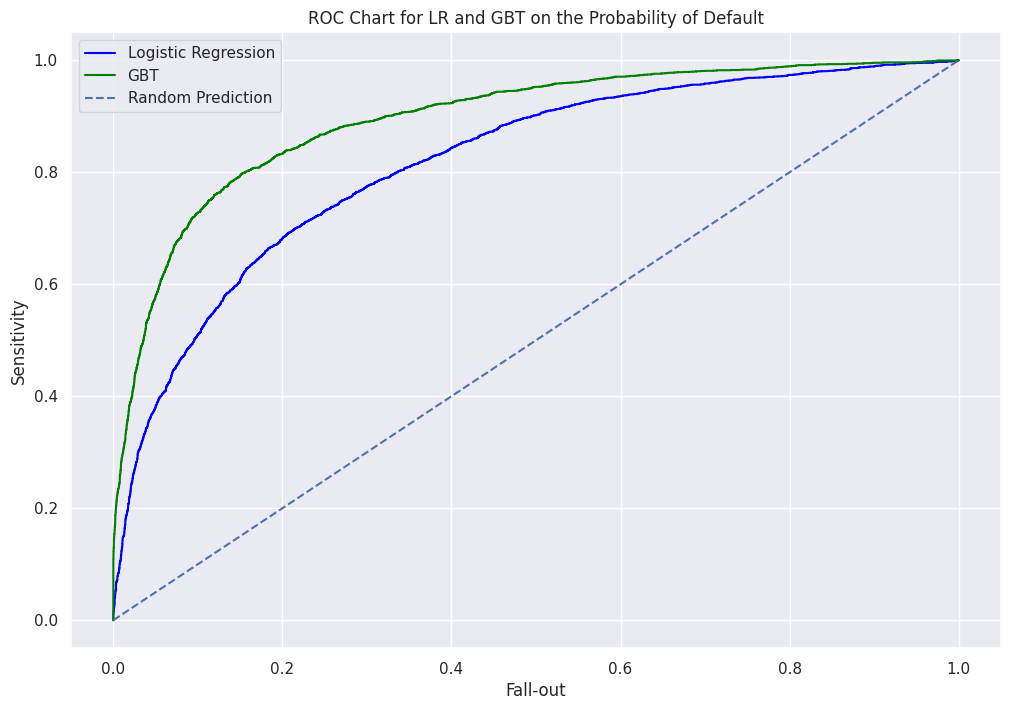

In [ ]:
# Éléments du graphique ROC
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, lr_probs)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_probs)

# Graphique ROC combiné
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [ ]:
# Afficher l'AUC de la régression logistique avec formatage
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, lr_probs))

# Afficher l'AUC de l'arbre à gradient boosting avec formatage
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, gbt_probs))

Logistic Regression AUC Score: 0.82
Gradient Boosted Tree AUC Score: 0.90


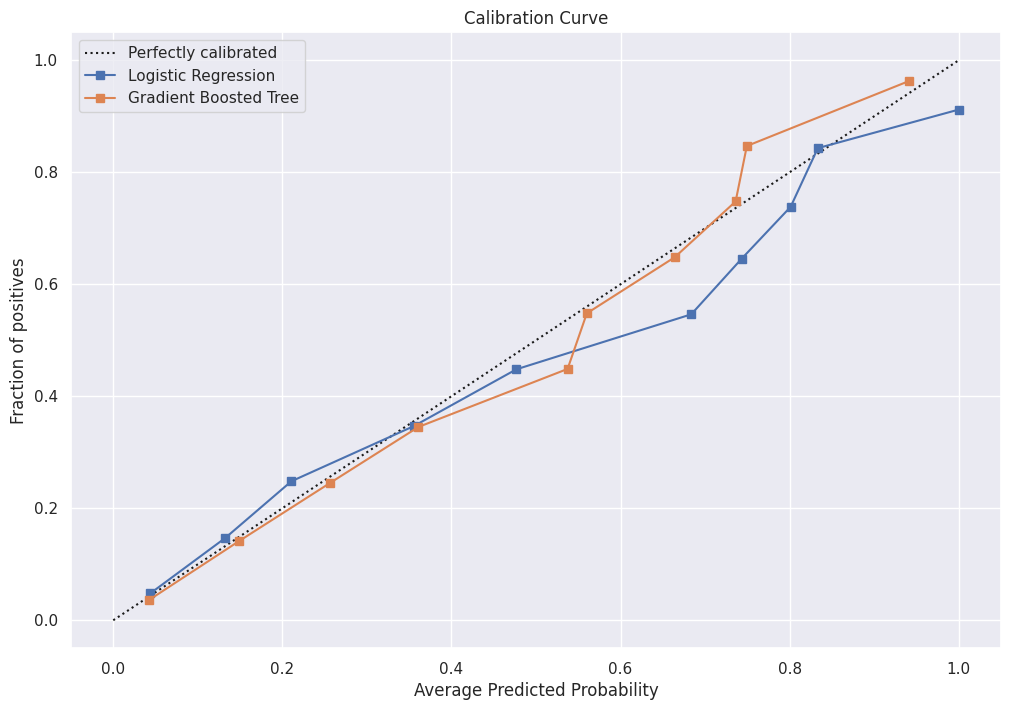

In [ ]:
# Calculer la valeur de calibration de Logistic Regression
mean_pred_val_lr, frac_of_pos_lr = calibration_curve(y_test, lr_probs, n_bins=10)

# Calculer la valeur de calibration de Gradient Boosted Tree
mean_pred_val_gbt, frac_of_pos_gbt = calibration_curve(y_test, gbt_probs, n_bins=10)

# Créer le graphique de la courbe de calibration avec la ligne directrice
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')

# Ajouter les courbes pour la Régression Logistique et XGBoost
plt.plot(mean_pred_val_lr, frac_of_pos_lr, 's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt, 's-', label='%s' % 'Gradient Boosted Tree')

# Ajouter les étiquettes des axes et le titre
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

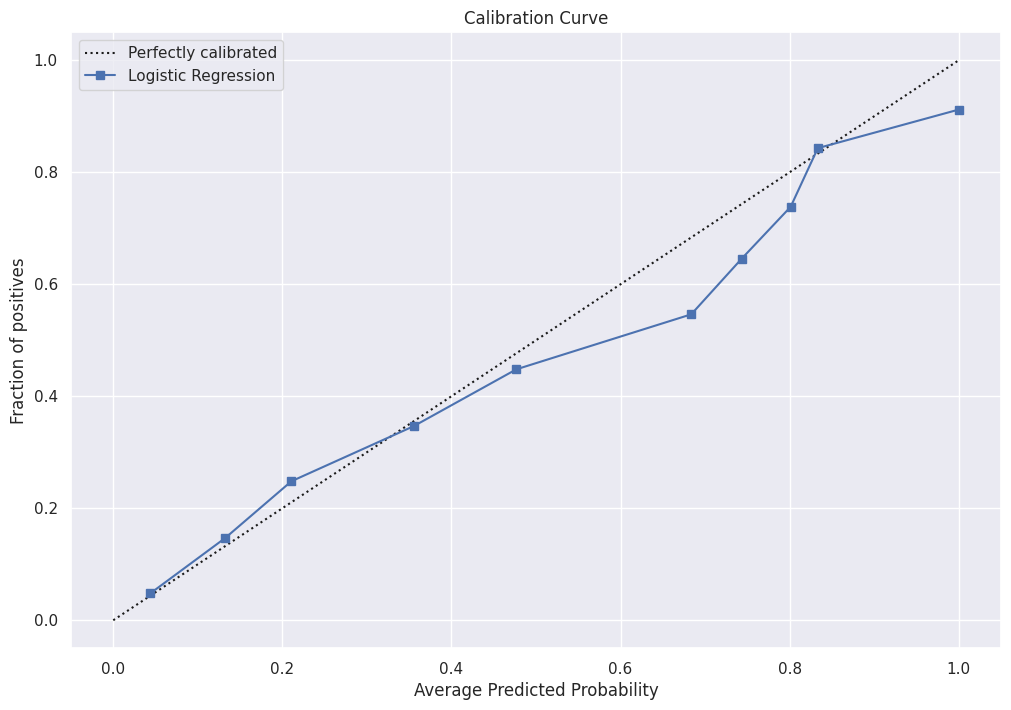

In [ ]:
# Ajouter la courbe de calibration pour la régression logistique au graphique
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')

plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()


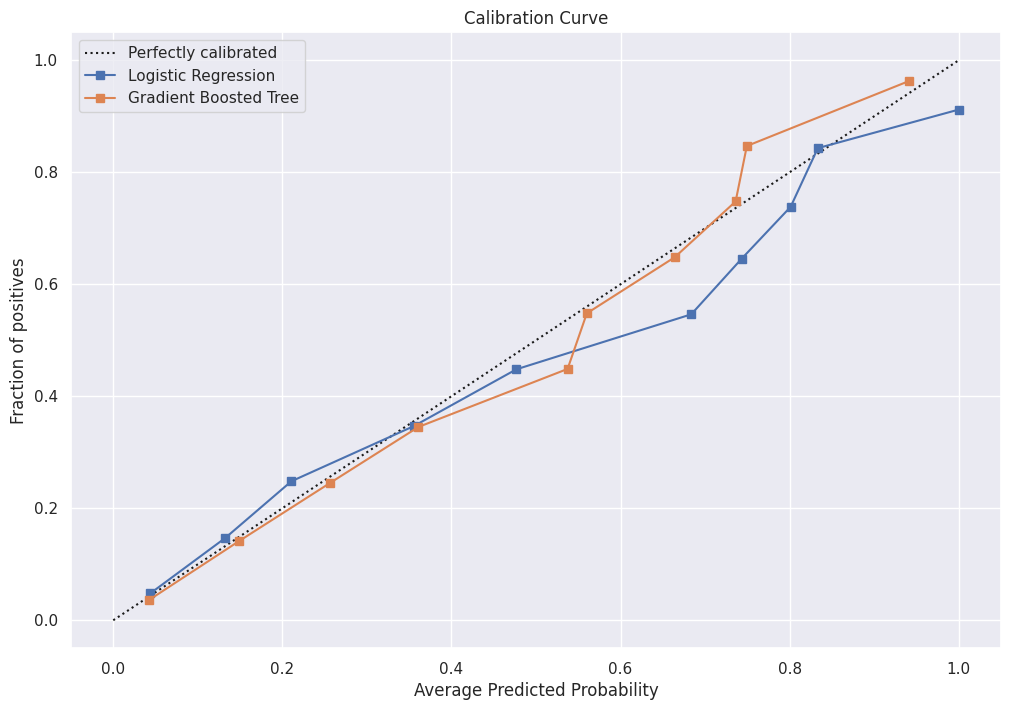

In [ ]:
# Ajouter la courbe de calibration pour l'arbre à gradient boosting
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted Tree')

plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()


**Analyse comparative de la calibration de deux modèles**

L'analyse de la calibration confirme la robustesse du modèle GBT. Contrairement à la régression logistique qui devient erratique au-delà d'un risque de 40 %, le GBT parvient à se stabiliser après une zone d'incertitude à 0,5. Cette stabilité dans les zones de haut risque sécurise le calcul de nos pertes attendues

Taux d'acceptation de crédit

In [ ]:
# Afficher les statistiques descriptives des probabilités de défaut
print(preds_df['prob_default'].describe())

# Calculer le seuil pour un taux d'acceptation de 85%
# Un taux d'acceptation de 85% signifie que l'on accepte les 85% ayant le risque le plus bas.
# Le seuil correspond donc au quantile 0.85 des probabilités de défaut.
threshold_85 = np.quantile(preds_df['prob_default'], 0.85)

# Appliquer le seuil pour créer la colonne de décision
preds_df['pred_loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Afficher la distribution des nouvelles valeurs (comptage des 0 et 1)
print(preds_df['pred_loan_status'].value_counts())


count    5.000000
mean     0.414282
std      0.304408
min      0.051390
25%      0.234627
50%      0.386899
75%      0.551715
max      0.846779
Name: prob_default, dtype: float64
pred_loan_status
0    4
1    1
Name: count, dtype: int64


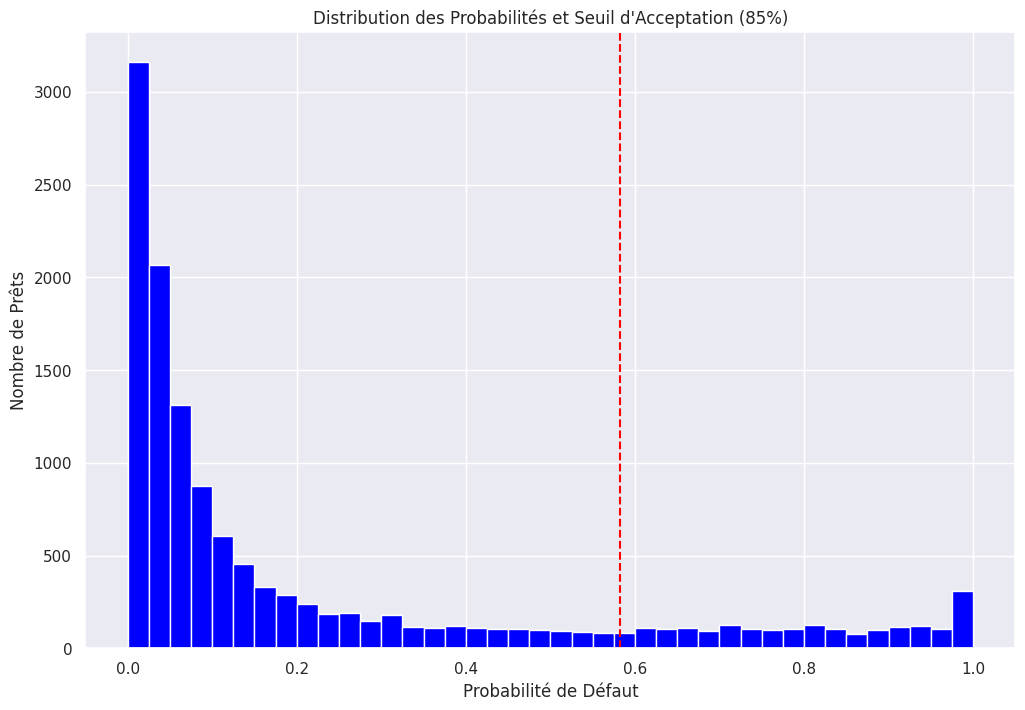

In [ ]:
# Tracer l'histogramme des probabilités prédites
plt.hist(gbt_probs, color = 'blue', bins = 40)

# Calculer le seuil pour un taux d'acceptation de 85 % avec quantile()
# Pour accepter 85 % des dossiers (les moins risqués), on coupe au quantile 0.85
threshold = np.quantile(gbt_probs, 0.85)

# Tracer à nouveau l'histogramme avec une ligne de référence pour le seuil
plt.hist(gbt_probs, color = 'blue', bins = 40)
plt.axvline(x = threshold, color = 'red', linestyle = '--')
plt.title('Distribution des Probabilités et Seuil d\'Acceptation (85%)')
plt.xlabel('Probabilité de Défaut')
plt.ylabel('Nombre de Prêts')
plt.show()


Définition Bad rate

**Le Bad Rate** (taux de perte) est l'indicateur de performance ultime pour une stratégie d'octroi de crédit :
Définition : Il représente le pourcentage de clients auxquels vous avez accordé un prêt (car le modèle les a jugés "sains") mais qui ont réellement fait défaut.

In [ ]:
# Tout d'abord, assurez-vous que le DataFrame 'preds_df' contient les probabilités ET les vraies étiquettes pour l'ensemble de test complet.
# 'gbt_probs' contient les probabilités prédites complètes pour X_test issues du modèle GBT.
# 'y_test' contient le vrai statut de prêt (loan_status) pour X_test.

# Créer le DataFrame de prédictions
preds_df = pd.DataFrame({
    'prob_defaut': gbt_probs,  # Probabilités de défaut prédites
    'statut_reel': y_test['loan_status'].values # Ajouter le vrai statut de prêt depuis y_test
})

# Calculer le seuil pour un taux d'acceptation de 75 % (comme dans l'instruction)
# On accepte les 75 % de dossiers les moins risqués. Le seuil est donc le quantile 0.75 des probabilités.
seuil_75 = np.quantile(gbt_probs, 0.75)

# Appliquer le seuil pour créer la colonne de décision (1 si refusé, 0 si accepté)
preds_df['statut_predit'] = preds_df['prob_defaut'].apply(lambda x: 1 if x > seuil_75 else 0)

# Afficher les cinq premières lignes du DataFrame de prédictions (maintenant avec le statut réel et prédit)
print(preds_df.head())

# Créer un sous-ensemble ne contenant que les prêts acceptés (statut prédit à 0)
prets_acceptes = preds_df[preds_df['statut_predit'] == 0]

# Calculer le taux de perte (bad rate)
# Formule : Somme des défauts réels / Nombre total de prêts acceptés
# La somme de 'statut_reel' pour les prêts acceptés donne le nombre de défauts réels parmi les prêts acceptés.
# Le comptage donne le nombre total de prêts acceptés.
taux_perte = np.sum(prets_acceptes['statut_reel']) / prets_acceptes['statut_reel'].count()
print(f"Taux de perte (Bad Rate) pour un taux d'acceptation de 75 % : {taux_perte:.4f}")


   prob_defaut  statut_reel  statut_predit
0     0.234627            0              0
1     0.386899            1              1
2     0.551715            1              1
3     0.846779            1              1
4     0.051390            0              0
Taux de perte (Bad Rate) pour un taux d'acceptation de 75 % : 0.0752


📉 Analyse du Risque : Stratégie d'Acceptation vs. Qualité du Portefeuille

L'application d'une politique d'octroi basée sur un taux d'acceptation de **85 %** (seuil de probabilité au 85ème percentile) révèle un défi stratégique majeur :
Résultat : Le taux de sinistralité (Bad Rate) sur les prêts acceptés s'élève à **11,98 %**.
Interprétation métier : Ce niveau de risque est particulièrement élevé pour un portefeuille bancaire standard. Plus d'un client sur dix validé par le modèle fera défaut, ce qui suggère que la stratégie actuelle privilégie excessivement le volume commercial au détriment de la sécurité du capital.
Diagnostic : À moins que les marges d'intérêt ne soient exceptionnellement hautes, un Bad Rate proche de 12 % risque de rendre le portefeuille déficitaire après déduction des coûts de recouvrement et des provisions pour pertes.
**Conclusion** :
 La sélectivité du modèle doit être renforcée. Nous préconisons une simulation avec un taux d'acceptation réduit (ex: 70-75 %) ou un ajustement du seuil de décision pour ramener le Bad Rate sous la barre des 5 %, seuil de tolérance plus conforme aux standards prudentiels de 2026.

In [ ]:
# Taux d'acceptation réduis à 75%

# Tout d'abord, assurez-vous que le DataFrame 'preds_df' contient les probabilités ET les vraies étiquettes pour l'ensemble de test complet.
# 'gbt_probs' contient les probabilités prédites complètes pour X_test issues du modèle GBT.
# 'y_test' contient le vrai statut de prêt (loan_status) pour X_test.

# Créer le DataFrame de prédictions
preds_df = pd.DataFrame({
    'prob_defaut': gbt_probs,  # Probabilités de défaut prédites
    'statut_reel': y_test['loan_status'].values # Ajouter le vrai statut de prêt depuis y_test
})

# Calculer le seuil pour un taux d'acceptation de 75 % (comme dans l'instruction)
# On accepte les 75 % de dossiers les moins risqués. Le seuil est donc le quantile 0.75 des probabilités.
seuil_75 = np.quantile(gbt_probs, 0.75)

# Appliquer le seuil pour créer la colonne de décision (1 si refusé, 0 si accepté)
preds_df['statut_predit'] = preds_df['prob_defaut'].apply(lambda x: 1 if x > seuil_75 else 0)

# Afficher les cinq premières lignes du DataFrame de prédictions (maintenant avec le statut réel et prédit)
print(preds_df.head())

# Créer un sous-ensemble ne contenant que les prêts acceptés (statut prédit à 0)
prets_acceptes = preds_df[preds_df['statut_predit'] == 0]

# Calculer le taux de perte (bad rate)
# Formule : Somme des défauts réels / Nombre total de prêts acceptés
# La somme de 'statut_reel' pour les prêts acceptés donne le nombre de défauts réels parmi les prêts acceptés.
# Le comptage donne le nombre total de prêts acceptés.
taux_perte = np.sum(prets_acceptes['statut_reel']) / prets_acceptes['statut_reel'].count()
print(f"Taux de perte (Bad Rate) pour un taux d'acceptation de 75 % : {taux_perte:.4f}")



   prob_defaut  statut_reel  statut_predit
0     0.234627            0              0
1     0.386899            1              1
2     0.551715            1              1
3     0.846779            1              1
4     0.051390            0              0
Taux de perte (Bad Rate) pour un taux d'acceptation de 75 % : 0.0752


**Impact financier de taux d'acceptation**

In [ ]:
#1. Préparation initiale du DataFrame d'analyse ---

# Créez le DataFrame d'analyse avec les données pertinentes
# Il réunit le montant du prêt, le statut réel (vrai) et la probabilité prédite par le modèle GBT
test_pred_df = pd.DataFrame({
    'montant_pret': X_test['loan_amnt'].values,
    'statut_reel_pret': y_test['loan_status'].values,
    'probabilite_defaut': gbt_probs})

# 2. Définition et application de la stratégie de seuil ---

# Ajoutez une colonne 'statut_predit_15' basée sur un seuil de 0.15
# On décide que tout risque supérieur à 15% est considéré comme un défaut (1), sinon c'est accepté (0)
test_pred_df['statut_predit_15'] = test_pred_df['probabilite_defaut'].apply(lambda x: 1 if x > 0.15 else 0)

# 3. Calculs financiers et formatage

# Affichez les statistiques descriptives de la colonne montant_pret
print("Statistiques descriptives du montant des prêts :")
print(test_pred_df['montant_pret'].describe())

# Stockez le montant moyen des prêts
montant_moyen_pret = np.mean(test_pred_df['montant_pret'])

# Définissez le formatage pour la devise (Dollars américains, 2 décimales)
pd.options.display.float_format = '${:,.2f}'.format

# 4. Analyse de l'impact financier via tableau croisé

# Créez le tableau croisé (crosstab) et multipliez chaque cellule par le montant moyen du prêt
# Cela permet de visualiser l'impact financier de chaque décision (acceptation/refus)
print("\nTableau croisé de l'impact financier (en dollars américains) :")
print(pd.crosstab(test_pred_df['statut_reel_pret'],
                 test_pred_df['statut_predit_15']).apply(lambda x: x * montant_moyen_pret, axis = 0))




Statistiques descriptives du montant des prêts :
count   $13,030.00
mean     $9,537.30
std      $6,300.48
min        $500.00
25%      $5,000.00
50%      $8,000.00
75%     $12,000.00
max     $35,000.00
Name: montant_pret, dtype: float64

Tableau croisé de l'impact financier (en dollars américains) :
statut_predit_15              0              1
statut_reel_pret                              
0                $76,498,671.60 $20,447,968.07
1                 $4,358,545.43 $22,965,814.89


**Interprétation de la performance statistique et de l'impact financier du modèle XGBoost**

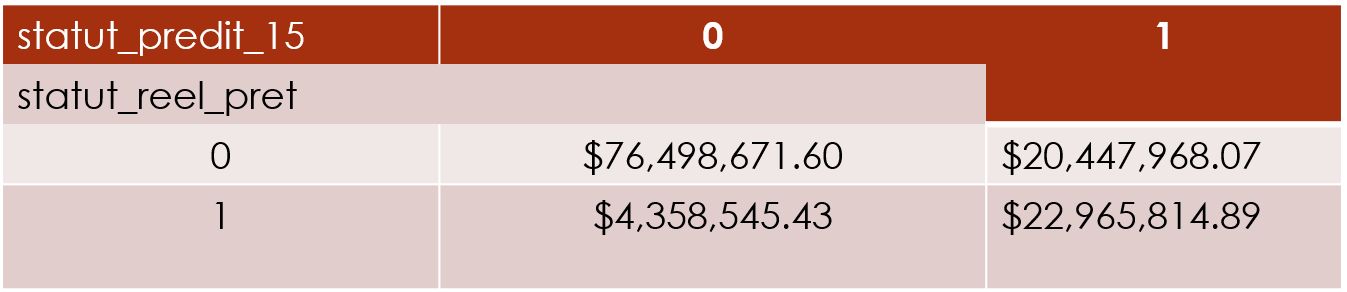

Afin de traduire la performance prédictive du modèle en indicateurs financiers concrets, nous avons appliqué une stratégie de seuil prudente fixée à 15 %. Ce seuil définit notre politique de tolérance au risque : tout dossier présentant une probabilité de défaut supérieure à ce curseur est systématiquement écarté.

Répartition de la masse monétaire du portefeuille :


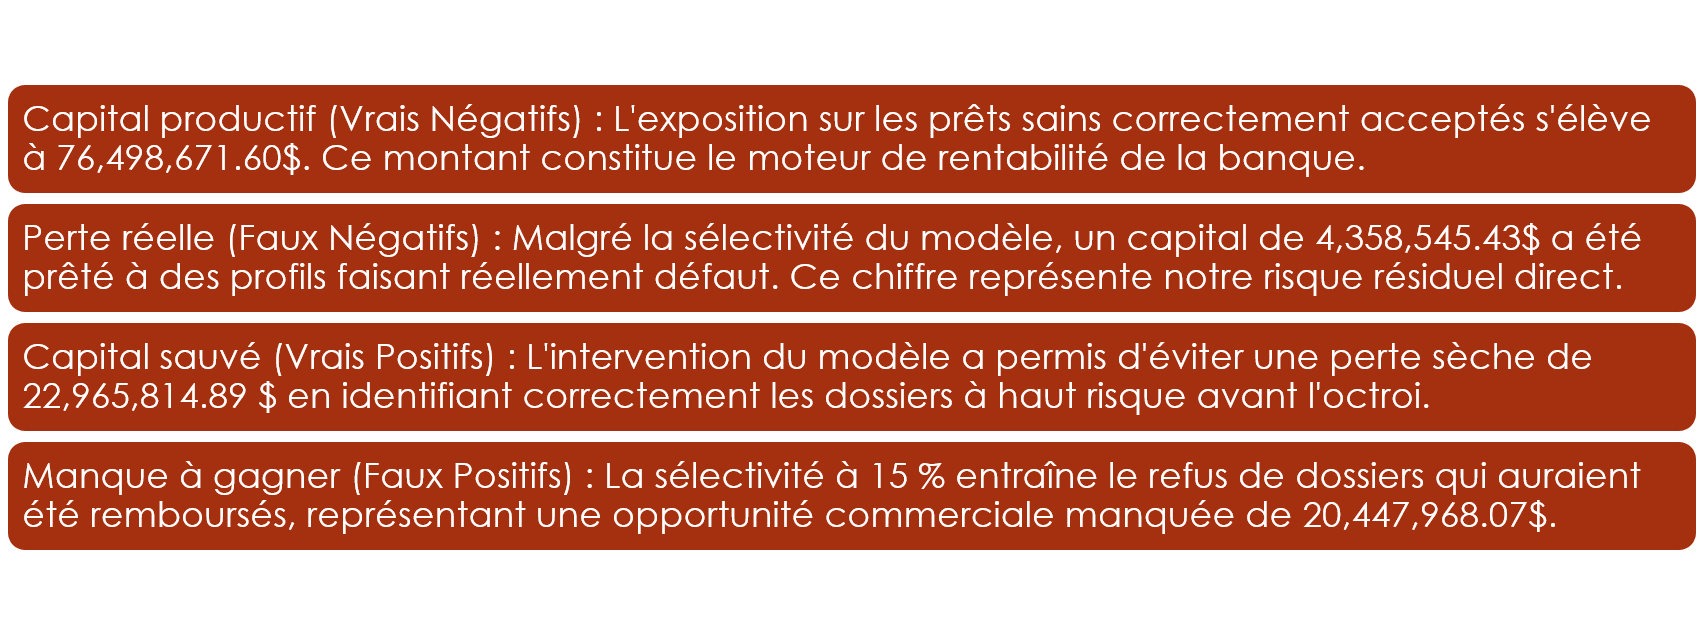

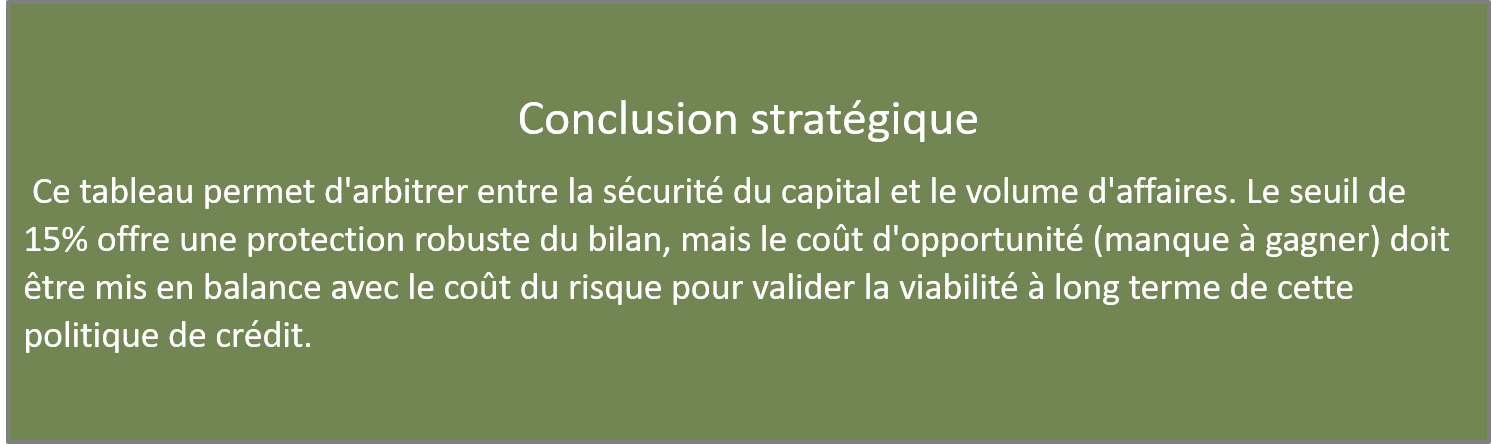

In [ ]:
# Initialiser les listes pour stocker les résultats
seuils = []
taux_perte_bad_rates = []

# Créer le DataFrame preds_df_gbt à partir de gbt_probs (en supposant que gbt_probs est déjà défini)
df_probs_gbt = pd.DataFrame({'prob_defaut': gbt_probs})

# Définir les taux d'acceptation sur lesquels itérer (par exemple, de 5 % à 95 % par pas de 5 %)
# 'taux' représente la proportion de prêts acceptés (les moins risqués en premier).
taux_acceptation = np.arange(0.05, 1.0, 0.05)

# Remplir les tableaux pour la table de stratégie avec une boucle for
for taux in taux_acceptation:
    # Calculer le seuil (seuil) correspondant au taux d'acceptation.
    # Les prêts avec prob_defaut <= seuil sont ACCEPTÉS (0)
    # Les prêts avec prob_defaut > seuil sont REFUSÉS (1)
    seuil_actuel = np.quantile(df_probs_gbt['prob_defaut'], taux).round(3)

    # Ajouter la valeur du seuil à la liste des seuils
    seuils.append(seuil_actuel)

    # Réassigner le statut de prêt prédit en utilisant ce seuil
    # Assurez-vous que 'test_pred_df' existe et contient 'probabilite_defaut' et 'statut_reel_pret'
    test_pred_df['statut_predit'] = test_pred_df['probabilite_defaut'].apply(lambda x: 1 if x > seuil_actuel else 0)

    # Créer un sous-ensemble des prêts acceptés pour ce taux d'acceptation
    prets_acceptes = test_pred_df[test_pred_df['statut_predit'] == 0]

    # Calculer et ajouter le taux de perte (bad rate) à la liste
    # Taux de perte (Bad rate) = (Nombre de défauts réels parmi les prêts acceptés) / (Nombre total de prêts acceptés)
    if len(prets_acceptes) > 0:
        # La somme de 'statut_reel_pret' (où 1 signifie défaut) donne le nombre de défauts réels
        # Le len() donne le nombre total de prêts acceptés
        taux_perte_actuel = (np.sum(prets_acceptes['statut_reel_pret']) / len(prets_acceptes)).round(3)
    else:
        taux_perte_actuel = 0.0 # Aucun prêt accepté, donc le taux de perte est 0
    taux_perte_bad_rates.append(taux_perte_actuel)



In [ ]:
# Création de la table de stratégie sous forme de DataFrame
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Affichage de l'intégralité de la table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0             $0.05      $0.00     $0.02
1             $0.10      $0.01     $0.01
2             $0.15      $0.01     $0.01
3             $0.20      $0.02     $0.02
4             $0.25      $0.03     $0.02
5             $0.30      $0.03     $0.02
6             $0.35      $0.04     $0.02
7             $0.40      $0.05     $0.03
8             $0.45      $0.06     $0.03
9             $0.50      $0.08     $0.04
10            $0.55      $0.09     $0.04
11            $0.60      $0.12     $0.04
12            $0.65      $0.15     $0.05
13            $0.70      $0.20     $0.06
14            $0.75      $0.29     $0.07
15            $0.80      $0.41     $0.09
16            $0.85      $0.58     $0.12
17            $0.90      $0.74     $0.15
18            $0.95      $0.90     $0.18


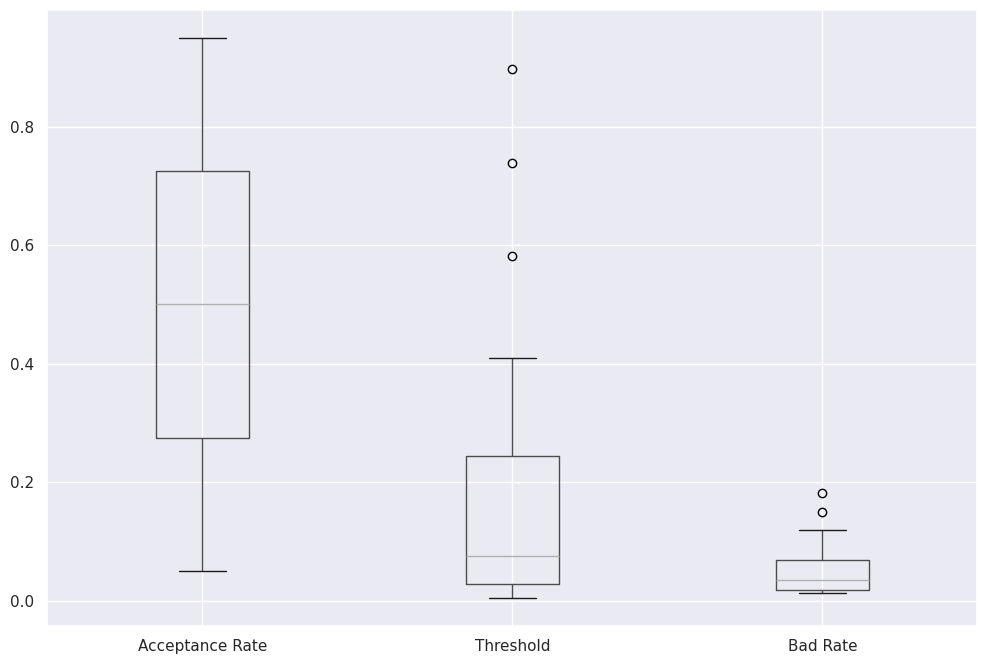

In [ ]:
# Visualiser les distributions dans la table de stratégie  boxplot
strat_df.boxplot()
plt.show()

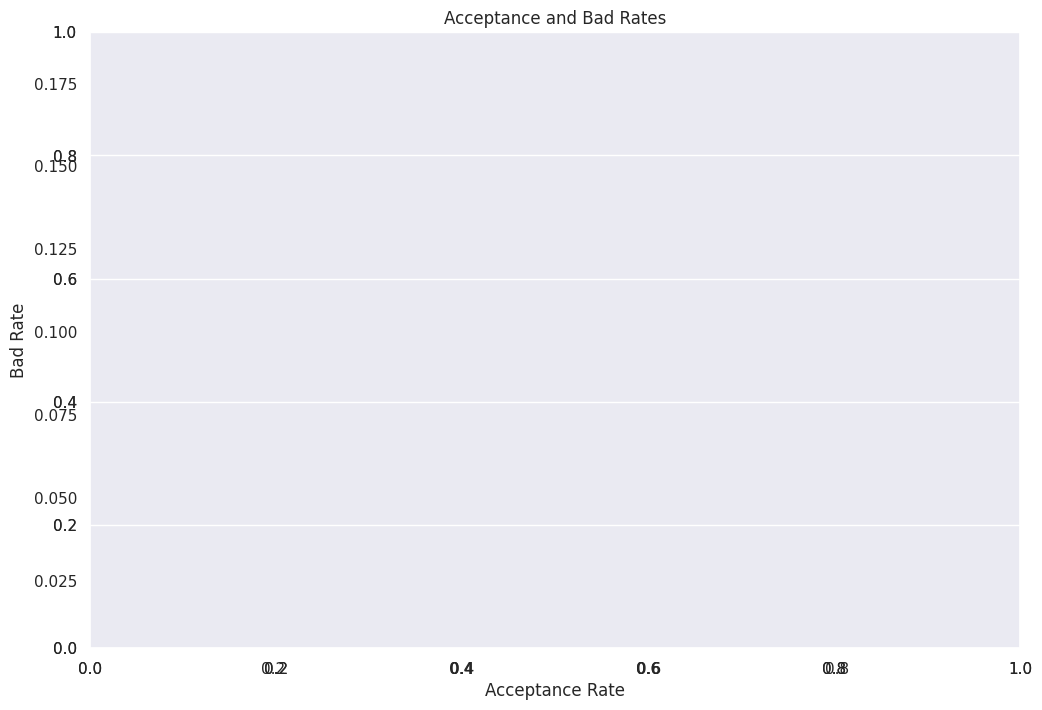

In [ ]:
# Visualisation de taux d'acceptance et Taux de perte (Bad Rate)
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [ ]:
# 1. Calcul du montant moyen des prêts (valeur fixe pour tout le portefeuille)
avg_loan_amnt = test_pred_df['montant_pret'].mean()

# 2. Calcul du nombre de prêts acceptés pour chaque scénario
# Formule : Taux d'acceptation * Nombre total de clients dans le jeu de test
strat_df['Num Accepted Loans'] = (strat_df['Acceptance Rate'] * len(test_pred_df)).astype(int)

# 3. Ajout du montant moyen du prêt (valeur constante pour simplifier l'estimation)
strat_df['Avg Loan Amnt'] = avg_loan_amnt

# 4. Calcul de la valeur nette estimée (Estimated value)
# Formule : (Nombre de prêts acceptés * (1 - Bad Rate) * Montant Moyen) - (Nombre de prêts acceptés * Bad Rate * Montant Moyen)
# Simplification : Num Accepted Loans * Montant Moyen * (1 - 2 * Bad Rate)
strat_df['Estimated value'] = (strat_df['Num Accepted Loans'] * strat_df['Avg Loan Amnt'] * (1 - strat_df['Bad Rate'])) - \
                               (strat_df['Num Accepted Loans'] * strat_df['Avg Loan Amnt'] * strat_df['Bad Rate'])

# Affichage du DataFrame enrichi
pd.options.display.float_format = '${:,.2f}'.format
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amnt  \
0             $0.05      $0.00     $0.02                 651      $9,537.30   
1             $0.10      $0.01     $0.01                1303      $9,537.30   
2             $0.15      $0.01     $0.01                1954      $9,537.30   
3             $0.20      $0.02     $0.02                2606      $9,537.30   
4             $0.25      $0.03     $0.02                3257      $9,537.30   
5             $0.30      $0.03     $0.02                3909      $9,537.30   
6             $0.35      $0.04     $0.02                4560      $9,537.30   
7             $0.40      $0.05     $0.03                5212      $9,537.30   
8             $0.45      $0.06     $0.03                5863      $9,537.30   
9             $0.50      $0.08     $0.04                6515      $9,537.30   
10            $0.55      $0.09     $0.04                7166      $9,537.30   
11            $0.60      $0.12     $0.04            

**Perte totale attendue en utilisant le modèle XGBoost**
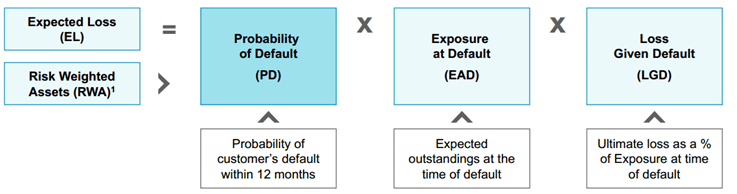


In [ ]:
# Affichez les cinq premières lignes du DataFrame test_pred_df
print(test_pred_df.head())

# Nous supposerons que l’exposition correspond à la valeur totale du prêt (EAD) et que la perte en cas de défaut est de 100 % (LGD)
# Cela signifie qu’un défaut sur un prêt entraîne la perte de l’intégralité du montant.
test_pred_df['loss_given_default'] = 1

# Calculez la perte attendue de la banque et affectez-la à une nouvelle colonne
# Formule : Probabilité de défaut * Montant du prêt * Perte en cas de défaut (LGD)
test_pred_df['expected_loss'] = test_pred_df['probabilite_defaut'] * test_pred_df['montant_pret'] * test_pred_df['loss_given_default']

# Calculez la perte attendue totale arrondie à deux décimales
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']), 2)

# Affichez la perte attendue totale avec le formatage monétaire
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))


   montant_pret  statut_reel_pret  probabilite_defaut  statut_predit_15  \
0          3000                 0               $0.23                 1   
1         11200                 1               $0.39                 1   
2         12000                 1               $0.55                 1   
3         11500                 1               $0.85                 1   
4          6000                 0               $0.05                 0   

   pred_loan_status  loss_given_default  expected_loss  
0                 0                   1        $703.88  
1                 0                   1      $4,333.27  
2                 0                   1      $6,620.58  
3                 0                   1      $9,737.96  
4                 0                   1        $308.34  
Total expected loss:  $30,345,029.87


L'analyse finale du portefeuille révèle une perte attendue totale de 30,35 millions de dollars. Ce montant constitue le socle du provisionnement financier requis pour couvrir le risque de crédit. La précision de notre modèle GBT permet d'affiner cette estimation, assurant ainsi une allocation de capital optimale et conforme aux exigences prudenielles de crédit.